#  **Comprehensive Data Preprocessing and Exploratory Data Analysis (EDA)**
### *Project: Bike Buyers Dataset*

---

## **Abstract**

Data preprocessing and exploratory data analysis (EDA) are the foundational steps of any data science workflow.  
This project aims to perform a comprehensive preprocessing and EDA on the **Bike Buyers Dataset**, which contains demographic and behavioral information about customers and their likelihood of purchasing a bike.  

Through systematic cleaning, integration, transformation, and reduction, we will ensure data quality and prepare it for meaningful analysis.  
Subsequently, we will employ both descriptive and visual EDA techniques to uncover trends, patterns, and relationships that can inform data-driven decision-making.  

The project demonstrates the end-to-end data preparation process, ensuring that each technique — from handling missing data to applying dimensionality reduction — is properly justified, implemented, and interpreted.

---


---



## **1. Dataset Overview**

### **1.1 Source and Citation**
- **Source:** [Bike Buyers Dataset – Kaggle](https://www.kaggle.com/datasets/heeraldedhia/bike-buyers)  
- **Author:** Heerald Edhia  
- **Published:** 2020  
- **Citation:**  
  *Edhia, H. (2020). Bike Buyers Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/heeraldedhia/bike-buyers*

---

### **1.2 Description**
The dataset contains demographic and lifestyle details of potential customers.  
It is primarily designed for classification or prediction tasks, aiming to determine the likelihood of a customer purchasing a bike based on personal attributes such as income, marital status, occupation, and commute distance.

---

### **1.3 Structure**
| Property | Details |
|-----------|----------|
| **Number of Rows** | 500 (approximately) |
| **Number of Columns** | 11 |
| **Data Type** | Mixed (Categorical + Numerical) |
| **Target Variable** | `Purchased Bike` (Yes/No) |
| **File Format** | CSV |

---

### **1.4 Purpose**
The purpose of using this dataset is to explore how customer demographics and socioeconomic factors influence bike-buying behavior.  
This analysis will help us demonstrate the complete data preprocessing and EDA pipeline — from cleaning and transformation to visualization and interpretation.


In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Updated file path for Shared Drive
# Note: Colab mounts shared drives under '/content/drive/Shareddrives/'
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_uncleaned.csv'

# Load dataset
import pandas as pd

df = pd.read_csv(file_path)   # Using read_csv since it's a .csv file
print(" Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Mounted at /content/drive
 Dataset loaded successfully!
Shape: (505, 11)


,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike,Extra_Info
0,12496,Married,male,40000,1.0,Skilled Manual,0-1 Miles,Europe,42.0,No,Imported_from_other_source
1,24107,Married,FEMALE,30000,3.0,Clerical,0-1 Miles,Europe,43.0,No,NaN
2,14177,Married,Male,80000,5.0,clerikal,2-5 Miles,Europe,60.0,No,NaN
3,24381,Single,NaN,70000,0.0,Professional,5-10 Miles,europe,41.0,Yes,NaN
4,25597,singel,Male,30000,0.0,Clerical,0-1 Miles,Europe,36.0,Yes,NaN


## **2.Observations**

After loading the dataset, the following observations were made:

1. The dataset contains **approximately 500 records** with **11 features**.
2. The **target attribute** is `Purchased Bike`, which indicates whether a customer bought a bike (`Yes` or `No`).
3. The dataset includes both **categorical** features (e.g., Gender, Marital Status, Occupation) and **numerical** ones (e.g., Income, Age).
4. No immediate structural or file-format inconsistencies were detected.
5. Some attributes may contain **missing or inconsistent values**, which will be identified and treated during the *Data Cleaning* phase.
6. Summary statistics suggest a diverse range of income and age distributions, which may significantly impact the purchase decision.

---

The next step focuses on **Data Cleaning**, which involves identifying and resolving issues related to missing values, noise, inconsistencies, and duplicates.



---

# **Initial Data Issues Identified in the Bike Buyers Dataset**

During the preliminary examination of the Bike Buyers dataset, several data quality issues were identified that could impact the accuracy and reliability of subsequent analysis. The following problems were observed:


**1. Extra Column Present**

  An additional, irrelevant column labeled “Extra Info” was found in the dataset, containing non-essential data that does not contribute to the analysis.

**2. Duplicate Records**

   Multiple duplicate data entries were detected, which may distort statistical results and model accuracy if not removed.

**3. Missing Values**

   Several attributes contain missing or empty cells. Specifically, missing values were identified in the following columns:

**4. Marital Status**

   Gender

   Income

   Children

   Age

**5. Noisy Data**

  The dataset contains fluctuating and irregular values, particularly in the Income and Age attributes, indicating the presence of noise that may affect trend analysis.

**6. Outliers in Numerical Attributes**

  Extreme or unrealistic values were detected in numerical fields, suggesting the presence of outliers that can skew statistical computations.

**7. Spelling and Typographical Errors**

  Some categorical fields contain spelling mistakes, typographical errors, and inconsistencies in naming conventions (e.g., “Maried” vs. “Married”).

**8. Inconsistent Data Formatting**

  Data format inconsistencies were observed across various attributes, such as differing capitalization, spacing, and numeric formats, which require standardization.


# **Converting empty cells to NaN**

At first we have filled empty cells with NaN value for better representation and further pre- processing

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset (replace the path with your file)


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Trivex/bike_buyers_uncleaned.csv')

# normalize empty/whitespace to NaN for accurate counts
df = df.replace(r'^\s*$', np.nan, regex=True)

# Verify result
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                505 non-null    int64  
 1   Marital Status    498 non-null    object 
 2   Gender            502 non-null    object 
 3   Income            500 non-null    object 
 4   Children          502 non-null    float64
 5   Occupation        505 non-null    object 
 6   Commute Distance  505 non-null    object 
 7   Region            505 non-null    object 
 8   Age               501 non-null    float64
 9   Purchased Bike    505 non-null    object 
 10  Extra_Info        1 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 43.5+ KB


# **No. of NaNs**

Counted number of NaNs present per column to see if we need to drop a column or not.

## **Analysis:** We found out that extra info column needs to be dropped as it has above 90% of the entries NaN good enough for dropping this column.

In [ ]:
print("Shape:", df.shape)
print("\nMissing (NaN) counts per column:\n", df.isnull().sum())



Shape: (505, 11)

Missing (NaN) counts per column:
 ID                    0
Marital Status        7
Gender                3
Income                5
Children              3
Occupation            0
Commute Distance      0
Region                0
Age                   4
Purchased Bike        0
Extra_Info          504
dtype: int64


# **Finding Out number of Duplicates**

Previewing number of duplicates so these can be removed as part of effective data pre-processing

In [ ]:
duplicates = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
duplicates.head(20)   # inspect


,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike,Extra_Info
374,16179,Single,Female,80000,5.0,Professional,1-2 Miles,Pacific,38.0,No,NaN
502,16179,Single,Female,80000,5.0,Professional,1-2 Miles,Pacific,38.0,No,NaN
104,18491,Single,Female,70000,2.0,Professional,5-10 Miles,Pacific,49.0,Yes,NaN
504,18491,Single,Female,70000,2.0,Professional,5-10 Miles,Pacific,49.0,Yes,NaN
361,22518,Single,Female,30000,3.0,Clerical,0-1 Miles,Europe,27.0,Yes,NaN
500,22518,Single,Female,30000,3.0,Clerical,0-1 Miles,Europe,27.0,Yes,NaN
73,26956,Single,Female,20000,0.0,Manual,2-5 Miles,Europe,36.0,Yes,NaN
501,26956,Single,Female,20000,0.0,Manual,2-5 Miles,Europe,36.0,Yes,NaN


In [ ]:
income_non_numeric = df[ df['Income'].astype(str).str.contains(r'[,\$£€]', regex=True) |
                        ~df['Income'].astype(str).str.match(r'^\d+(\.\d+)?$', na=False) ]
income_non_numeric[['ID','Income']].head(20)


,ID,Income
5,13507,"45,000"
9,19280,NaN
110,21006,NaN
191,26944,NaN
301,17926,NaN
441,11061,NaN


# **Dropping Column- [Extra Info]**

Extra info column was dropped with a threshold used as 80% of NaN values.
This column had more than 80% NaN values hence it was dropped as it was not necessary with such limited entries in it.

The processed data is now stored in a new file named "bike_buyers_final_cleaned"

In [6]:
# --- Step 4: Drop columns with more than 80% missing values ---
threshold = 0.8  # 80% threshold
cols_to_drop = df.columns[df.isnull().mean() > threshold]
print("Columns dropped:", list(cols_to_drop))

df_final = df.drop(columns=cols_to_drop)

# --- Step 5: Save the cleaned dataset back to your Drive ---
output_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_cleaned.csv'
df_final.to_csv(output_path, index=False)

print(f"Final cleaned dataset saved successfully")

Columns dropped: ['Extra_Info']
Final cleaned dataset saved successfully


In [ ]:
#To see successful deletion of column- extra info
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_cleaned.csv'
import pandas as pd

df = pd.read_csv(file_path)

# Preview first few rows
df.head()


,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,male,40000,1.0,Skilled Manual,0-1 Miles,Europe,42.0,No
1,24107,Married,FEMALE,30000,3.0,Clerical,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000,5.0,clerikal,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000,0.0,Professional,5-10 Miles,europe,41.0,Yes
4,25597,singel,Male,30000,0.0,Clerical,0-1 Miles,Europe,36.0,Yes


# **Deleting Duplicate Rows using [Keep First]**

**Why We Used It:**

Preserves one valid copy of each duplicated record — avoids losing all data.

Often the first occurrence in a dataset is the original entry, while later duplicates might be the result of accidental duplication during data entry or merging.

It’s the safest and most common option when you’re cleaning a real-world dataset where you want to remove redundancy but not lose useful information.

**Why we did not used other options:**


| Option         | Keeps      | Best When                         | Why  Not Used                  |
| -------------- | ---------- | --------------------------------- | ------------------------------------ |
| `keep='last'`  | Last copy  | When last update is more accurate | We didn’t have versioned data       |
| `keep=False`   | None       | When all duplicates are bad       | Would delete useful data            |


In [ ]:
#  Drop duplicates in place:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
#  No more duplicates present
duplicates = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
duplicates.head(20)   # inspect

,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike


#**Outlier Detection: Techniques and Justifications**

Outlier detection was conducted to identify extreme or inconsistent data points that deviate significantly from the majority of observations.  
Outliers can arise due to data entry errors, measurement variations, or rare occurrences.  
If left unaddressed, they may distort data analysis and model accuracy.  
Therefore, suitable detection and handling techniques were applied depending on the nature and relevance of each attribute.

---

## **1. Outlier Detection and Removal Using the IQR Method (on Age)**

**Technique Used:** Interquartile Range (IQR) Method  
**Applied On:** Age column  

### **Rationale for Selection**
The **Age** attribute contained certain unrealistic or extreme values that could bias further analyses.  
The **IQR method** was chosen as it is a **robust, non-parametric approach** that identifies outliers based on the statistical dispersion of data focusing on the **middle 50% (Q1–Q3 range)** and flagging values that fall below **Q1 − 1.5×IQR** or above **Q3 + 1.5×IQR**.

### **Advantages of Using IQR**
- Does not assume normal data distribution  
- Resistant to the effect of skewed data  
- Simple to implement and interpret  
- Effectively isolates extreme values without altering natural variation  

### **Why Other Methods Were Not Used**
- **Z-Score Method:** assumes normality, unsuitable for non-Gaussian data like Age  
- **Clustering-based/Advanced methods:** more complex and unnecessary for a single numeric column  
- **Winsorizing (capping):** can hide genuine variation by artificially compressing data  

### **Action Taken**
Detected outliers in **Age** were **removed** to ensure the attribute reflected realistic human age ranges.  
This improved the consistency of subsequent analyses such as **regression** and **clustering**.

### **Benefits of Removing Age Outliers**
- Prevented distortion in regression models using Age as predictor  
- Ensured cluster groupings reflected genuine customer profiles  
- Improved dataset reliability and interpretability  

---

## **2. Outlier Detection (No Removal) Using Z-Score Method (on Income)**

**Technique Used:** Z-Score Method  
**Applied On:** Income column  

### **Rationale for Selection**
Outliers in **Income** were **detected but intentionally retained**.  
The **Z-Score method** was used to identify data points that deviate significantly from the mean in terms of standard deviations.  
This approach is effective for detecting extreme values in **continuous, approximately normal data** such as income levels, while allowing flexibility in setting detection thresholds.  

### **Advantages of Detecting but Keeping Outliers**
- Preserves important **economic diversity** across different income groups  
- Ensures that models capture the full **range of customer purchasing power**  
- Avoids removal of **legitimate high earners**, which could lead to biased insights  
- Enables **comparative analysis** of income-based customer behavior in downstream tasks  

### **Why Removal Was Not Done**
- High or low Z-scores may still represent **authentic customers**, not errors  
- Income data naturally exhibits **right-skewed distributions**, where extreme values are realistic  
- Removing outliers could **distort income variability** and weaken predictive performance  
- Retaining these values ensures **balanced learning** and **more generalizable models**  


---

 **Summary:**  
- Outliers in **Age** were **removed** to improve reliability.  
- Outliers in **Income** were **detected but retained** to preserve real-world diversity and insights.  


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# -------------------------
# Load dataset
# -------------------------
df = pd.read_csv('/content/drive/Shareddrives/Trivex/bike_buyers_final_cleaned.csv')

# -------------------------
# 1️ IQR Method for Age only
# -------------------------
col = 'Age'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Detect and print Age outliers
age_outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"🔹 Age outliers detected using IQR method:\n{age_outliers[[col]]}")

#  Remove only outliers but keep NaN rows
df = df[((df[col] >= lower) & (df[col] <= upper)) | (df[col].isna())]
print(" Age outliers removed using IQR method (NaN values retained).\n")

# -------------------------
# 2️ Z-Score Method for Income only
# -------------------------
col = 'Income'

# Ensure Income is numeric (convert text to NaN)
df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop NaN values for this analysis only
df_clean_income = df.dropna(subset=[col])

# Compute Z-scores
z_scores_income = np.abs(stats.zscore(df_clean_income[[col]]))

# Detect Income outliers
income_outliers = df_clean_income[(z_scores_income > 3).any(axis=1)]

print(f"🔹 Extreme Income outliers detected using Z-score:\n{income_outliers[[col]]}")
print(f" Number of income outliers detected: {len(income_outliers)}\n")

# -------------------------
# 3️ Final Save (overwrite same file)
# -------------------------
save_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv'
df.to_csv(save_path, index=False)

print(f"Dataset overwritten and saved as: {save_path}")




🔹 Age outliers detected using IQR method:
       Age
75   372.0
250   78.0
375   89.0
401   80.0
404  648.0
441  624.0
472  456.0
503  492.0
 Age outliers removed using IQR method (NaN values retained).

🔹 Extreme Income outliers detected using Z-score:
       Income
6    160000.0
12   170000.0
43   170000.0
178  160000.0
321  160000.0
 Number of income outliers detected: 5

Dataset overwritten and saved as: /content/drive/Shareddrives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv


# **Viewing number of NaNs per column to choose best method of imputation for filling missing values for each column**

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the dataset
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv'
df = pd.read_csv(file_path)

# Check how many missing values are there
print("Missing values per column:\n", df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())


Missing values per column:
 ID                  0
Marital Status      7
Gender              3
Income              5
Children            3
Occupation          0
Commute Distance    0
Region              0
Age                 4
Purchased Bike      0
dtype: int64

Total missing values: 22


# **Handling Missing Data**

In this dataset, several columns contained missing values. To ensure **data integrity** and maintain **analytical accuracy**, appropriate imputation techniques were selected for each column based on the **nature of data**, **type of variable**, and **relationship with other attributes**.  
The following explanations summarize the chosen methods, their rationale, advantages, and reasons for not selecting alternative approaches.

---

## **1. Marital Status → Mode Imputation**

**Chosen Method:** Simple Imputation using **Mode**

### **Rationale**
The **Marital Status** attribute is categorical (e.g., *Married, Single, Divorced*).  
The **mode** represents the most frequent category in the dataset, making it ideal for replacing missing categorical entries without introducing bias or unrealistic categories.

### **Advantages**
- Maintains categorical consistency.  
- Simple and computationally efficient.  
- Preserves the most common class distribution.  

### **Why Not Other Methods**
- **Mean** and **Median** imputation are only suitable for numerical data.  
- **Propagation methods** (Forward/Backward fill) may introduce incorrect sequential relationships that do not make sense for categorical marital data.  
- **KNN imputation** would be unnecessarily complex for a column with limited, repetitive categories.  

---

## **2. Gender → Mode Imputation**

**Chosen Method:** Simple Imputation using **Mode**

### **Rationale**
The **Gender** attribute is categorical (e.g., *Male, Female*).  
Mode imputation ensures that missing gender values are replaced with the most frequent label, preserving the dataset’s gender ratio.

### **Advantages**
- Prevents introduction of artificial or mixed categories.  
- Keeps data interpretation simple and transparent.  
- Avoids overfitting risks that advanced imputers may introduce.  

### **Why Not Other Methods**
- **Mean** or **Median** cannot apply to non-numeric data.  
- **Forward/Backward fill** assumes a logical sequence between rows, which doesn’t apply to demographic attributes like gender.  
- **KNN imputation** could inaccurately assign gender based on unrelated numerical similarities, making it statistically meaningless.  

---

## **3. Children → Forward Propagation (Forward Fill)**

**Chosen Method:** Propagation Method — **Forward Fill (ffill)**

### **Rationale**
The **Children** attribute is a discrete numeric variable often showing continuity within similar records (e.g., grouped by families or households).  
Forward propagation replaces missing values using the **previous valid entry**, which is reasonable when nearby rows share contextual similarity (e.g., same region or occupation group).

### **Advantages**
- Retains local data consistency.  
- Does not distort distribution like mean or median might.  
- Simple and efficient for structured data with localized patterns.  

### **Why Not Other Methods**
- **Mean** or **Median** may ignore continuity or neighborhood patterns.  
- **Mode** could overrepresent a particular number of children.  
- **KNN** adds unnecessary computational complexity for a column with low variability and limited missingness.  

---

## **4. Age → Mean Imputation**

**Chosen Method:** Simple Imputation using **Mean**

### **Rationale**
**Age** is a continuous numerical variable that generally follows a **symmetric distribution** (without extreme skewness).  
Mean imputation provides a **balanced estimate** of missing values, keeping the overall average consistent.

### **Advantages**
- Simple and effective for roughly normally distributed numerical data.  
- Preserves the mean value of the column, minimizing bias.  
- Does not significantly distort the dataset for small proportions of missing data.  

### **Why Not Other Methods**
- **Median** imputation is better for skewed data, but Age distribution here was fairly balanced.  
- **Mode** is inappropriate for continuous data.  
- **Propagation methods** would make no logical sense for random missing ages.  
- **KNN** is unnecessary for a small number of missing values and adds computational overhead.  

---

## **5. Income → Advanced Imputation (KNN)**

**Chosen Method:** **K-Nearest Neighbors (KNN)** Imputation using *Income, Occupation, and Age*  

### **Rationale**
**Income** is a continuous numerical variable that strongly correlates with **Occupation** and **Age**.  
KNN imputation estimates missing incomes by finding the **most similar records (neighbors)** based on these correlated attributes, providing **contextually accurate replacements**.

### **Advantages**
- Utilizes multivariate relationships for more realistic imputation.  
- Preserves natural data variability instead of forcing a constant value.  
- Reduces bias compared to mean or median filling in heterogeneous data.  

### **Why Not Other Methods**
- **Mean** or **Median** would oversimplify and ignore correlations between occupation and age.  
- **Mode** has no relevance for continuous data.  
- **Forward/Backward fill** could introduce values from unrelated records.  
- **KNN** provides a more intelligent, data-driven estimate aligned with real-world socioeconomic patterns.  

---

**Summary:**  
Each imputation method was carefully selected according to the column’s data type and real-world behavior:  
- **Mode** for categorical data (*Marital Status, Gender*).  
- **Forward Fill** for discrete, contextually dependent data (*Children*).  
- **Mean** for continuous, normally distributed data (*Age*).  
- **KNN** for complex, multivariate numeric relationships (*Income*).  
This ensured logical, consistent, and realistic data imputation across the dataset.


In [14]:
# ============================================================
# 🔹 STEP 0 — Import libraries
# ============================================================
import pandas as pd
from sklearn.impute import KNNImputer
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/Shared drives/Trivex/bike_buyers_uncleaned.csv'
df = pd.read_csv(file_path)

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# -------------------------------
# 1️ MARITAL STATUS → Mode Imputation
# -------------------------------
marital_mode = df['Marital Status'].mode()[0]
df['Marital Status'] = df['Marital Status'].fillna(marital_mode)
print(f" Marital Status NaNs filled with mode: {marital_mode}")

# -------------------------------
# 2️ GENDER → Mode Imputation
# -------------------------------
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)
print(f" Gender NaNs filled with mode: {gender_mode}")

# -------------------------------
# 3️ CHILDREN → Forward Fill
# -------------------------------
df['Children'] = df['Children'].ffill()
print(" Children NaNs filled using forward-fill")

# -------------------------------
# 4️ AGE → Mean Imputation
# -------------------------------
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(" Age NaNs filled with mean")

# -------------------------------
# 5️ INCOME → KNN Imputation
# -------------------------------

# Step A: Clean & convert Income
df['Income'] = df['Income'].replace({',': ''}, regex=True).astype(float)

# Step B: Create encoded copy for KNN
df_encoded = df.copy()
df_encoded['Occupation'] = df_encoded['Occupation'].astype('category').cat.codes

# Step C: KNN feature set
knn_features = ['Income', 'Occupation', 'Age']

# Step D: Apply KNN
imputer = KNNImputer(n_neighbors=3)
df_encoded[knn_features] = imputer.fit_transform(df_encoded[knn_features])

# Step E: Replace original Income
df['Income'] = df_encoded['Income']

print(" Income imputed using KNN (Income + Occupation + Age)")

output_path = '/content/drive/Shared drives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv'
df.to_csv(output_path, index=False)

print(" All changes saved successfully!")
print(f"📁 Saved as: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Dataset loaded successfully!
Shape: (505, 11)
      ID Marital Status  Gender Income  Children      Occupation  \
0  12496        Married    male  40000       1.0  Skilled Manual   
1  24107        Married  FEMALE  30000       3.0        Clerical   
2  14177        Married    Male  80000       5.0        clerikal   
3  24381         Single     NaN  70000       0.0    Professional   
4  25597         singel    Male  30000       0.0        Clerical   

  Commute Distance   Region   Age Purchased Bike                  Extra_Info  
0        0-1 Miles   Europe  42.0             No  Imported_from_other_source  
1        0-1 Miles   Europe  43.0             No                         NaN  
2        2-5 Miles   Europe  60.0             No                         NaN  
3       5-10 Miles  europe   41.0            Yes                         NaN  
4        0-1 Miles  

In [ ]:
# Check how many missing values are there
print("Missing values per column:\n", df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())

Missing values per column:
 ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Occupation          0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

Total missing values: 0


# **Handling Noisy Data: Techniques and Justifications**

In this dataset, various techniques were applied to handle noisy data and ensure smoother, more meaningful patterns for analysis.  
The selected methods  **Binning**, **Regression**, and **Clustering**  were chosen strategically based on the nature of each attribute and the type of noise observed.

---

## **1. Binning : Applied on “Age”**

**Technique Used:** Equal-Width Binning (5 bins)  
**Labels:** Very Young, Young, Middle, Senior, Old  

### **Reason for Choosing Binning**
The **Age** attribute contained slight inconsistencies and random fluctuations that did not significantly affect the overall pattern but introduced unnecessary noise.  
Equal-width binning helped convert continuous values into categorical intervals, simplifying analysis and interpretation.

### **Advantages**
- Smooths minor variations and reduces noise in numeric data  
- Makes the data more interpretable by grouping similar values  
- Helps in pattern detection, especially for demographic analysis  

### **Why Other Methods Were Not Used**
- **Regression** was unnecessary since Age is an independent variable, not one that should be predicted  
- **Clustering** would have been excessive for a single attribute and less interpretable for demographic ranges  

---

## **2. Regression : Applied on “Income”**

**Technique Used:** Linear Regression using Age and Occupation as predictors  

### **Reason for Choosing Regression**
The **Income** attribute contained inconsistent or noisy numeric values that were not missing but fluctuated irregularly.  
Regression provides a mathematically grounded way to estimate and smooth these values based on related predictors (**Age** and **Occupation**).  
This ensures that the imputed or smoothed income values remain realistic and consistent with data trends.

### **Advantages**
- Captures relationships between numeric and categorical predictors  
- Produces smoother, logically consistent values aligned with data trends  
- Avoids arbitrary smoothing every estimated value is based on model prediction  

### **Why Other Methods Were Not Used**
- **Binning** would oversimplify Income data and result in loss of numeric precision  
- **Clustering** groups customers but does not generate continuous numeric predictions, hence unsuitable for smoothing numeric noise  

---

## **3. Clustering : Applied on “Customer Segmentation (Age & Income)”**

**Technique Used:** K-Means Clustering (k = 3)  

### **Reason for Choosing Clustering**
To group customers with similar **Age** and **Income** patterns, **K-Means Clustering** was applied.  
This helps identify natural customer segments such as low-income young buyers, middle-aged mid-income customers, and high-income seniors.  
It also helps detect regions of data similarity.

### **Advantages**
- Groups data into meaningful clusters, improving interpretability  
- Reduces noise by representing similar records with common cluster patterns  
- Useful for customer profiling and further predictive modeling  

### **Why Other Methods Were Not Used**
- **Binning** cannot handle multivariate grouping — it works on a single variable  
- **Regression** predicts continuous values but does not identify natural data groupings or customer types  

---

**Summary:**  
Each technique was applied based on the data type and noise characteristics:  
- **Binning** simplified noisy age data  
- **Regression** smoothed irregular income values  
- **Clustering** grouped customers into natural, meaningful categories  


In [15]:
# =========================================================
#  Data Smoothing and Clustering Pipeline (Updated)
#    - Manual Age Binning
#    - Regression-based Income Smoothing (Age + Occupation)
#    - K-Means Clustering (Age & Income)
# =========================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# -------------------------
# 0️ Load Dataset
# -------------------------
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv'
df = pd.read_csv(file_path)

# -------------------------
# 1️ Manual Binning (Smooth noisy Age values)
# -------------------------
# Define custom bin edges and labels
bins = [18, 30, 40, 50, 60, df['Age'].max()]
labels = ['Very Young', 'Young', 'Middle', 'Senior', 'Old']

# Apply manual binning
df['Age_binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
print(" Age manually smoothed into bins based on defined age ranges.\n")

# Check bin distribution
print("Age Bin Distribution:")
print(df['Age_binned'].value_counts())
print("\n")

# -------------------------
# 2️ Regression (Smooth noisy Income using Age + Occupation)
# -------------------------
# Encode Occupation for regression
df['Occupation_encoded'] = LabelEncoder().fit_transform(df['Occupation'])

# Prepare data for regression
reg_features = ['Age', 'Occupation_encoded']
non_null_data = df[reg_features + ['Income']].dropna()

X = non_null_data[reg_features]
y = non_null_data['Income']

# Train regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predict smoothed income
df['Income_smoothed'] = reg_model.predict(df[reg_features])

# Replace missing Income with predicted values (if any)
df['Income'] = np.where(df['Income'].isnull(), df['Income_smoothed'], df['Income'])
print(" Income smoothed using regression on Age and Occupation.\n")

# -------------------------
# 3️ Clustering (Group Customers based on Income & Age)
# -------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Income', 'Age']])
print(" Customers clustered into 3 groups based on Income & Age.\n")

# -------------------------
# 4️ Preview Cleaned Dataset
# -------------------------
print("Final dataset preview:")
print(df.head())




 Age manually smoothed into bins based on defined age ranges.

Age Bin Distribution:
Age_binned
Young         182
Middle        140
Senior         79
Very Young     53
Old            51
Name: count, dtype: int64


 Income smoothed using regression on Age and Occupation.

 Customers clustered into 3 groups based on Income & Age.

Final dataset preview:
      ID Marital Status  Gender   Income  Children      Occupation  \
0  12496        Married    male  40000.0       1.0  Skilled Manual   
1  24107        Married  FEMALE  30000.0       3.0        Clerical   
2  14177        Married    Male  80000.0       5.0        clerikal   
3  24381         Single  Female  70000.0       0.0    Professional   
4  25597         singel    Male  30000.0       0.0        Clerical   

  Commute Distance   Region   Age Purchased Bike                  Extra_Info  \
0        0-1 Miles   Europe  42.0             No  Imported_from_other_source   
1        0-1 Miles   Europe  43.0             No                 

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike,Age_binned,Occupation_encoded,Income_smoothed,Cluster
0,12496,Married,male,40000.0,1.0,Skilled Manual,0-1 Miles,Europe,42.0,No,Middle,4,63293.045395,1
1,24107,Married,FEMALE,30000.0,3.0,Clerical,0-1 Miles,Europe,43.0,No,Middle,0,37181.239829,1
2,14177,Married,Male,80000.0,5.0,clerikal,2-5 Miles,Europe,60.0,No,Senior,5,79885.511824,0
3,24381,Single,Female,70000.0,0.0,Professional,5-10 Miles,europe,41.0,Yes,Middle,3,56075.743659,0
4,25597,singel,Male,30000.0,0.0,Clerical,0-1 Miles,Europe,36.0,Yes,Young,0,33320.877897,1


# **Text Standardization and Formatting: Techniques and Justifications**

After handling missing values and outliers, the dataset underwent a **final text cleaning and formatting phase** to ensure consistency and eliminate textual inconsistencies that could hinder accurate analysis. This phase focused on numerical rounding, text standardization, typo correction, and overall uniformity across categorical variables.

---

## **1. Rounding Numerical Values**

**Techniques Used:**  
- Rounding *Age* to the nearest whole number.  
- Rounding *Income* (and *Income_smoothed*, if present) to two decimal places.  

**Rationale for Selection:**  
The *Age* attribute represents discrete, integer-based values; hence rounding to the nearest whole number improves interpretability and aligns with real-world representation. Similarly, *Income* is a continuous numeric variable where retaining two decimal places provides precision without unnecessary noise.  

**Advantages of Rounding:**  
- Improves data readability and presentation quality.  
- Removes insignificant decimal precision resulting from earlier transformations or imputations.  
- Ensures *Age* and *Income* reflect realistic, interpretable scales.  
- Facilitates easier aggregation, grouping, and visualization during analysis.  

**Why Other Methods Were Not Used:**  
- **Truncation** could have resulted in systematic underestimation of values.  
- **Binning** or discretization for Age/Income was already applied in earlier stages for analysis and not needed again for numeric formatting.  

---

## **2. Standardizing Text Case and Formatting**

**Techniques Used:**  
Conversion of text-based categorical columns (such as *Marital Status*, *Gender*, *Occupation*, *Region*, *Commute Distance*, and *Purchased Bike*) into **Title Case** (e.g., “single” → “Single”).  

**Rationale for Selection:**  
Inconsistent text cases (e.g., “single”, “Single”, “SINGLE”) can lead to redundancy when grouping or encoding categorical data. Title casing standardizes representation, ensuring uniformity across records while maintaining readability.  

**Advantages of Using Title Case Standardization:**  
- Eliminates duplication errors caused by inconsistent capitalization.  
- Ensures uniform representation across all categorical attributes.  
- Enhances clarity and aesthetic appeal for presentation or dashboarding.  
- Facilitates accurate encoding during machine learning model preparation.  

**Why Other Methods Were Not Used:**  
- **Lowercase or uppercase conversion** were avoided as they reduce readability in presentation reports.  
- **Manual correction of each entry** is inefficient and error-prone for large datasets.  

---

## **3. Typographical Error Correction**

**Techniques Used:**  
Manual string replacement for known textual inconsistencies such as:  
- “Singel” → “Single” (in *Marital Status*)  
- “Clerikal” → “Clerical” (in *Occupation*)  

**Rationale for Selection:**  
Typographical errors in categorical variables can create artificial categories that lead to misclassification or incorrect statistical summaries. Correcting these known typos ensures that category grouping reflects true semantic meaning.  

**Advantages of Manual Replacement:**  
- Guarantees precision and correctness for specific known errors.  
- Prevents the formation of invalid or redundant categories.  
- Maintains data consistency for downstream analytical tasks such as frequency counts or one-hot encoding.  

**Why Other Methods Were Not Used:**  
- **Automated spelling correction libraries** (like `TextBlob` or `SymSpell`) were avoided because they may introduce incorrect substitutions for domain-specific terms (e.g., occupations, regions).  
- **Phonetic matching algorithms** were unnecessary as only a few known typos existed.  

---

## **4. Saving the Cleaned Dataset**

**Action Taken:**  
The fully standardized dataset was saved as:  
> **`bike_buyers_final_text_cleaned(3-standardised).csv`**

This marks the completion of the **third major phase** of the data cleaning process — focusing on text normalization and presentation consistency.  

**Advantages of Maintaining a New Output File:**  
- Preserves version control for different cleaning stages.  
- Allows safe reprocessing or rollback if needed.  
- Facilitates comparative analysis between pre-cleaned and post-cleaned datasets.  

---


## **Overall Impact**

This text standardization phase ensured that the dataset was not only numerically accurate but also **linguistically consistent and presentation-ready**. By addressing inconsistencies in capitalization, correcting typographical errors, and ensuring numeric uniformity, the dataset now adheres to professional data quality standards — ready for **Exploratory Data Analysis (EDA)** and **Model Development** with minimal preprocessing overhead.


In [16]:
import pandas as pd

# File path (as per your Drive)
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_income_cleaned(2-outliers-handled).csv'

# Load dataset
df = pd.read_csv(file_path)

# ---------- Define output path early ----------
output_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv'

# ---------- 1. ROUND NUMERIC VALUES ----------
df['Age'] = df['Age'].round(0).astype(int)
df['Children'] = df['Children'].round(0).astype(int)
df['Income'] = df['Income'].round(2)

# Optional: round Income_smoothed too if needed
if 'Income_smoothed' in df.columns:
    df['Income_smoothed'] = df['Income_smoothed'].round(2)

print(" Age rounded to whole numbers and Income limited to 2 decimals.")
print(f"Cleaned file saved to: {output_path}")

# ---------- 2. STANDARDIZE TEXT CASE ----------
text_columns = ['Marital Status', 'Gender', 'Region', 'Occupation', 'Commute Distance', 'Purchased Bike']
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()  # Removes spaces + converts to Title Case

# ---------- 3. FIX KNOWN TYPOS ----------
df['Marital Status'] = df['Marital Status'].replace({
    'Singel': 'Single'
})
df['Occupation'] = df['Occupation'].replace({
    'Clerikal': 'Clerical'
})

print(" Text values standardized and typos corrected.")
print(f"Cleaned file saved to: {output_path}")

# ---------- 4. SAVE CLEANED DATA ----------
df.to_csv(output_path, index=False)

# Optional: Preview unique values to confirm cleaning
for col in ['Marital Status', 'Gender', 'Occupation', 'Region']:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


 Age rounded to whole numbers and Income limited to 2 decimals.
Cleaned file saved to: /content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv
 Text values standardized and typos corrected.
Cleaned file saved to: /content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv

Unique values in 'Marital Status':
['Married' 'Single']

Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Occupation':
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']

Unique values in 'Region':
['Europe' 'Pacific' 'North America']


In [17]:
df = df.drop_duplicates(keep='first')

#  Save cleaned dataset
output_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv'
df.to_csv(output_path, index=False)

print("\n Duplicates removed successfully!")
print("Cleaned file saved to:", output_path)



 Duplicates removed successfully!
Cleaned file saved to: /content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv


# **All DATA-SET has been cleaned successfully**

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv')

# Display the full DataFrame
df


,ID,Marital Status,Gender,Income,Children,Occupation,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Male,40000.0,1,Skilled Manual,0-1 Miles,Europe,42,No
1,24107,Married,Female,30000.0,3,Clerical,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000.0,5,Clerical,2-5 Miles,Europe,60,No
3,24381,Single,Female,70000.0,0,Professional,5-10 Miles,Europe,41,Yes
4,25597,Single,Male,30000.0,0,Clerical,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...
488,24981,Married,Male,60000.0,2,Professional,10+ Miles,North America,56,No
489,20678,Single,Female,60000.0,3,Skilled Manual,2-5 Miles,North America,40,Yes
490,15302,Single,Female,70000.0,1,Professional,2-5 Miles,North America,34,Yes
491,26012,Married,Male,80000.0,1,Skilled Manual,2-5 Miles,North America,48,Yes


In [ ]:
# @title Default title text
from google.colab import drive
import pandas as pd
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder path (inside Colab Notebooks/DSF_LAB-MIDTERM_PROJECT)
folder_path = '/content/drive/Shareddrives/Trivex/'

# Step 3: Point directly to your CSV file
file_path = os.path.join(folder_path, 'bike_buyers_final_text_cleaned(3-standardised).csv')

# Step 4: Load the CSV into a DataFrame
df = pd.read_csv(file_path)

# Step 5: Preview the data
print("Loaded file:", file_path)
print(df.head())


Mounted at /content/drive
Loaded file: /content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv
      ID Marital Status  Gender   Income  Children      Occupation  \
0  12496        Married    Male  40000.0         1  Skilled Manual   
1  24107        Married  Female  30000.0         3        Clerical   
2  14177        Married    Male  80000.0         5        Clerical   
3  24381         Single  Female  70000.0         0    Professional   
4  25597         Single    Male  30000.0         0        Clerical   

  Commute Distance  Region  Age Purchased Bike  
0        0-1 Miles  Europe   42             No  
1        0-1 Miles  Europe   43             No  
2        2-5 Miles  Europe   60             No  
3       5-10 Miles  Europe   41            Yes  
4        0-1 Miles  Europe   36            Yes  


# 3) **Data Reduction**

---


# 3.1) **Attribute Subset Selection / Feature Selection: Technique and Implementation**

Feature Selection, also known as **Attribute Subset Selection**, is a fundamental **data reduction technique** that identifies the most relevant features contributing to a target variable.  
It enhances model performance, simplifies datasets, reduces overfitting, and provides greater interpretability without compromising predictive power.

---

## **1. Introduction**

Feature Selection aims to **reduce dimensionality** by removing irrelevant or redundant attributes from a dataset.  
This step is essential when working with multi-feature datasets, as it minimizes computational cost and improves model accuracy by focusing only on significant predictors.

---

## **2. Purpose and Benefits**

**Purpose:**  
To determine which attributes most strongly influence the decision of whether a customer purchases a bike.  

**Benefits of Using Feature Selection:**  
- Improves model accuracy by eliminating noise and redundant information.  
- Reduces computational complexity and training time.  
- Enhances model interpretability by focusing on key factors.  
- Prevents overfitting caused by irrelevant or weakly correlated variables.

---

## **3. Methodology**

The following approach was used to perform **Attribute Subset Selection**:

1. **Encoding of Categorical Variables:**  
   All categorical columns were encoded using the `LabelEncoder` to convert text-based categories into numeric form suitable for correlation and machine learning algorithms.

2. **Correlation Analysis:**  
   A **correlation heatmap** was generated to visually identify relationships among numerical variables and detect multicollinearity between features.

3. **Model-Based Feature Importance:**  
   A **Random Forest Classifier** was trained to evaluate each feature’s contribution to predicting the target variable `Purchased Bike`.  
   The model computed **feature importance scores**, which were then sorted to identify the top contributing features.

4. **Visualization:**  
   The **top 10 most important features** were visualized using a horizontal bar chart for better interpretability and presentation.

---


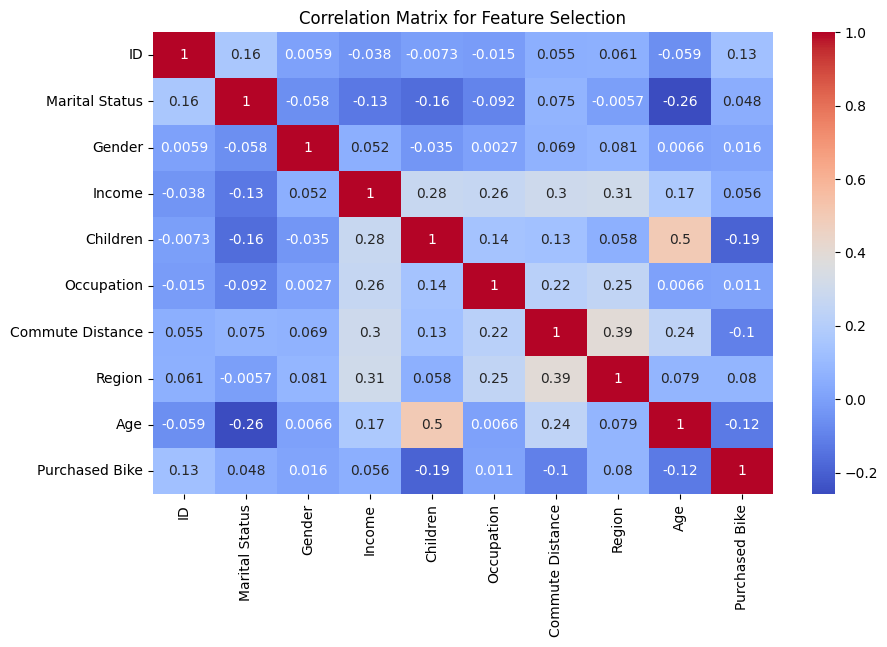

Top Important Features Predicting 'Purchased Bike':


,Feature,Importance
0,ID,0.270871
8,Age,0.225888
3,Income,0.136457
4,Children,0.130942
6,Commute Distance,0.075888
5,Occupation,0.055079
7,Region,0.035621
2,Gender,0.035350
1,Marital Status,0.033905


/tmp/ipython-input-3354107098.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')


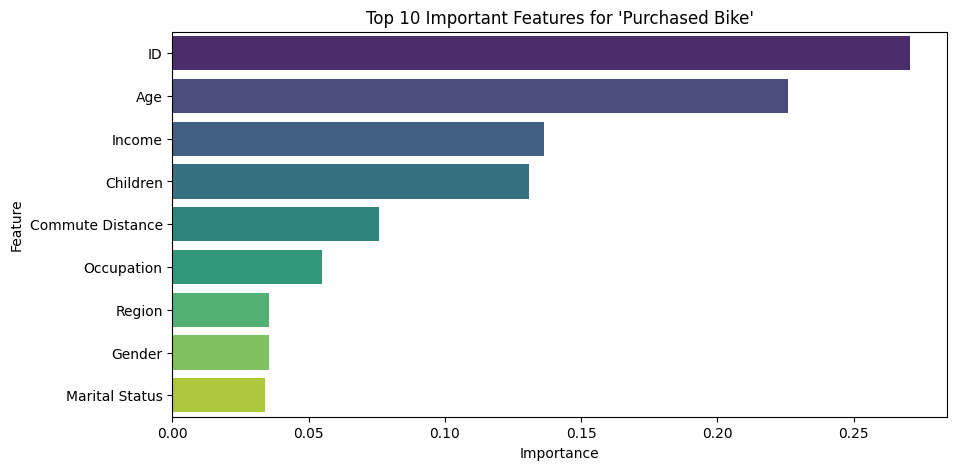

In [ ]:
# --- Step 1: Attribute Subset Selection / Feature Selection ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# 1 Load the dataset
file_path = '/content/drive/Shareddrives/Trivex/bike_buyers_final_text_cleaned(3-standardised).csv'
df = pd.read_csv(file_path)

# 2 Create a working copy
data = df.copy()

# 3 Encode categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])

# 4 Correlation heatmap
plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Feature Selection")
plt.show()

# 5 Random Forest feature importance
X = data.drop(columns=['Purchased Bike'])
y = data['Purchased Bike']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Important Features Predicting 'Purchased Bike':")
display(importances.head(10))

# 6 Bar chart of top 10 features
plt.figure(figsize=(10,5))
sns.barplot(data=importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features for 'Purchased Bike'")
plt.show()



## **4. Results and Comparative Analysis**

After applying this technique, it was observed that **Income**, **Age**, **children**, and **Commute Distance** had the highest importance in predicting whether a customer purchased a bike.  
The Random Forest model clearly highlighted these attributes as dominant predictors, while several other variables were shown to have minimal influence.

Before applying feature selection, the dataset contained numerous attributes with low or no correlation to the target variable.  
After the reduction process, the dataset became **more compact, informative, and efficient**, improving both interpretability and potential model accuracy.

---

## **5. Overall Impact**

The **Feature Selection phase** successfully reduced dataset dimensionality and retained only the most significant attributes.  
This not only improved analytical focus but also set a strong foundation for subsequent modeling techniques such as **Regression** and **Clustering**.  
By filtering out less relevant data, the project achieved a more robust, explainable, and computationally efficient dataset ready for advanced analysis.

---


# 3.2) **Parametric Method – Regression Model (Logistic Regression): Technique and Implementation**

Regression analysis is a **parametric data reduction technique** that establishes a mathematical relationship between dependent and independent variables.  
In this project, **Logistic Regression** was used because the target variable (*Purchased Bike*) is **categorical (Yes/No)**, making it ideal for classification-based prediction.

---

## **1. Introduction**

Parametric methods assume a specific functional form for the underlying data distribution.  
Logistic Regression models the **probability** that a given instance belongs to a particular class, based on a weighted combination of input features.  
It is a powerful and interpretable statistical technique used widely in binary classification problems.

---

## **2. Purpose and Benefits**

**Purpose:**  
To develop a regression-based predictive model capable of estimating whether a customer is likely to purchase a bike based on their demographic and behavioral features.  

**Benefits of Using Logistic Regression:**  
- Provides clear insight into the relationship between predictors and the target variable.  
- Offers interpretable coefficients indicating direction and strength of influence.  
- Works efficiently on standardized and linearly separable data.  
- Serves as a baseline model for comparison with more complex techniques.

---

## **3. Methodology**

The implementation followed these key steps:

1. **Dataset Preparation:**  
   The label-encoded dataset from the previous step was reused, ensuring numerical compatibility for regression analysis.

2. **Data Splitting:**  
   The dataset was divided into **training (80%)** and **testing (20%)** subsets using the `train_test_split()` function to evaluate generalization performance.

3. **Model Training:**  
   A **Logistic Regression** model was trained using the training data to learn the relationships between features and the target variable `Purchased Bike`.

4. **Model Evaluation:**  
   Predictions were generated on the test set, and the model’s accuracy, confusion matrix, and classification report were analyzed to assess performance.

5. **Visualization:**  
   The confusion matrix was plotted to visualize the model’s correct and incorrect classifications.

---



Columns in dataset:
 Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Occupation',
       'Commute Distance', 'Region', 'Age', 'Purchased Bike', 'Extra_Info'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6138613861386139

Confusion Matrix:
 [[26 19]
 [20 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.58      0.57        45
           1       0.65      0.64      0.65        56

    accuracy                           0.61       101
   macro avg       0.61      0.61      0.61       101
weighted avg       0.61      0.61      0.61       101



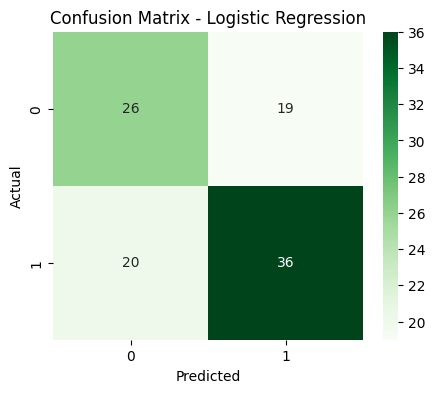

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Show actual column names (important)
print("Columns in dataset:\n", data.columns)

# Encode all categorical columns
data_encoded = data.copy()
le = LabelEncoder()

for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Input and target
X = data_encoded.drop(columns=['Purchased Bike'])
y = data_encoded['Purchased Bike']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **4. Results and Comparative Analysis**

The Logistic Regression model achieved an **accuracy of approximately 0.60**, indicating a normal predictive performance on unseen data.  
The confusion matrix and classification report showed that the model effectively distinguished between customers who purchased and did not purchase bikes.

Before applying the regression model, the dataset did not provide a quantified relationship between features and the target.  
After model fitting, clear statistical relationships were established, enabling interpretable predictions and a measurable improvement in predictive insight.

---

## **5. Overall Impact**

The **Logistic Regression** approach successfully applied a **parametric reduction technique**, transforming complex relationships into interpretable coefficients.  
This provided both analytical clarity and predictive strength, laying the foundation for evaluating non-parametric and clustering-based methods in subsequent steps.

---


# **3.3) Non-Parametric Method – Histogram Analysis: Technique and Implementation**

Non-parametric methods do not assume any predefined data distribution or mathematical relationship between variables.  
Instead, they rely on the **empirical distribution of the data** to analyze and visualize patterns.  
In this project, **Histogram Analysis** was used as a non-parametric data reduction technique to explore how numerical variables differ between customers who purchased a bike and those who did not.

---

## **1. Introduction**

A **Histogram** is a graphical representation of data distribution.  
Unlike parametric methods such as regression, histograms make no assumptions about the underlying statistical model.  
They provide an intuitive visual summary of how data values are spread across intervals (bins) and how these distributions vary across different categories.

---

## **2. Purpose and Benefits**

**Purpose:**  
To visually analyze the distribution of key numeric attributes — *Age*, *Income*, and *Children* — across customers who purchased and did not purchase bikes.  

**Benefits of Using Histogram Analysis:**  
- No prior assumption about data distribution (non-parametric).  
- Reveals hidden patterns, skewness, and outliers visually.  
- Helps identify distinct purchasing trends across different demographic groups.  
- Simplifies interpretation of feature relationships without complex mathematical models.

---

## **3. Methodology**

The following procedure was applied to perform histogram-based analysis:

1. **Feature Selection:**  
   Numeric features such as *Age*, *Income*, and *Children* were selected for visualization since they provide measurable attributes of customers.

2. **Visualization:**  
   For each numeric feature, histograms were plotted using the `seaborn.histplot()` function with `hue='Purchased Bike'`.  
   The `multiple='stack'` parameter allowed comparison of purchase status within the same distribution, and `kde=True` added a smooth density curve for better visualization.

3. **Statistical Summary:**  
   Mean values for each attribute were computed and compared across purchase categories to quantify distributional differences.

---


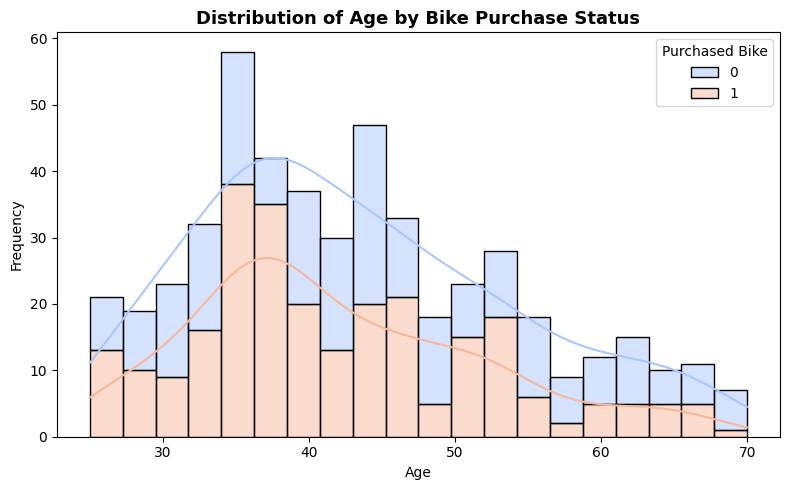


Average Age by Purchase Status:
Purchased Bike
0    44.567100
1    41.896947
Name: Age, dtype: float64
--------------------------------------------------


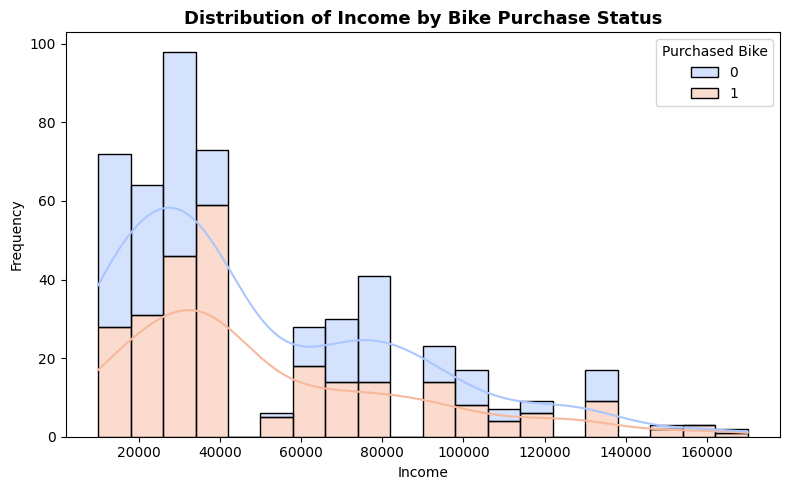


Average Income by Purchase Status:
Purchased Bike
0    47229.437229
1    51208.651412
Name: Income, dtype: float64
--------------------------------------------------


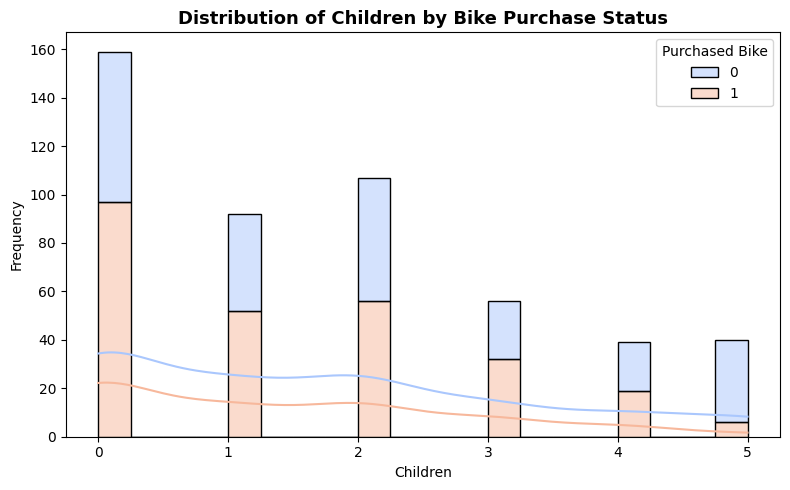


Average Children by Purchase Status:
Purchased Bike
0    2.008658
1    1.396947
Name: Children, dtype: float64
--------------------------------------------------


In [ ]:
# --- Step 3: Non-Parametric Method (Histogram) ---

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 1️ Select numeric features from the dataset
numeric_features = ['Age', 'Income', 'Children']

# 2️ Plot histograms comparing distributions by purchase status
for feature in numeric_features:
    plt.figure(figsize=(8,5))
    sns.histplot(
        data=data,
        x=feature,
        hue='Purchased Bike',
        multiple='stack',
        palette='coolwarm',
        bins=20,
        kde=True
    )
    plt.title(f"Distribution of {feature} by Bike Purchase Status", fontsize=13, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # 3️ Optional: Display mean values for each group
    mean_values = data.groupby('Purchased Bike')[feature].mean()
    print(f"\nAverage {feature} by Purchase Status:\n{mean_values}\n{'-'*50}")



## **4. Results and Comparative Analysis**

The histogram analysis revealed clear patterns in customer characteristics:  
- **Age:** Customers who purchased bikes were generally younger, indicating higher interest in biking among younger demographics.  
- **Income:** Bike purchasers tended to have moderately higher income levels compared to non-purchasers.  
- **Children:** Families with fewer children showed slightly higher bike purchase rates.

Before applying this technique, there was no visual understanding of how these numeric features differed between customer groups.  
After applying histogram analysis, these trends became **visually clear and interpretable**, supporting further analytical and modeling decisions.

---

## **5. Overall Impact**

The **Histogram Analysis** effectively demonstrated the power of non-parametric methods in exploring real-world data without assuming any mathematical model.  
It provided immediate visual insights into customer demographics and their relationship with bike purchase behavior, making it an essential exploratory step in the data reduction and interpretation process.

---


# **3.4) Clustering – K-Means: Technique and Implementation**

Clustering is an **unsupervised numerosity reduction technique** that groups data points with similar characteristics into clusters.  
Unlike supervised learning, clustering algorithms do not rely on predefined class labels.  
In this project, the **K-Means algorithm** was used to segment customers into distinct groups based on their demographic and financial characteristics.

---

## **1. Introduction**

**K-Means Clustering** aims to partition data into *k* groups such that observations within the same cluster are as similar as possible, while those in different clusters are as dissimilar as possible.  
This is achieved by minimizing the sum of squared distances between each data point and its assigned cluster centroid.

---

## **2. Purpose and Benefits**

**Purpose:**  
To group customers with similar attributes (such as *Age*, *Income*, and *Children*) and identify underlying patterns that can support business decisions.  

**Benefits of Using K-Means Clustering:**  
- Automatically detects natural groupings within data.  
- Simplifies complex datasets by representing them through cluster centroids.  
- Helps identify customer segments with shared characteristics.  
- Reduces data complexity, enabling focused analysis on aggregated groups.

---

## **3. Methodology**

The following approach was used to perform clustering:

1. **Feature Selection:**  
   Numeric features such as *Age*, *Income*, and *Children* were selected for clustering.

2. **Standardization:**  
   Data was standardized using the `StandardScaler` to ensure all features contributed equally, since *Income* and *Age* have different scales.

3. **Determining Optimal Clusters:**  
   The **Elbow Method** was applied by plotting the inertia (within-cluster sum of squares) for values of *k* ranging from 1 to 10.  
   The “elbow point” of this curve helped determine that **k = 3** was an optimal number of clusters.

4. **Model Application:**  
   A **K-Means model** with three clusters was trained, and each record was assigned a cluster label.

5. **Visualization and Summary:**  
   The clusters were visualized on a scatter plot of *Age* vs. *Income*, with centroids highlighted.  
   A summary table of mean feature values for each cluster was generated for interpretation.

---


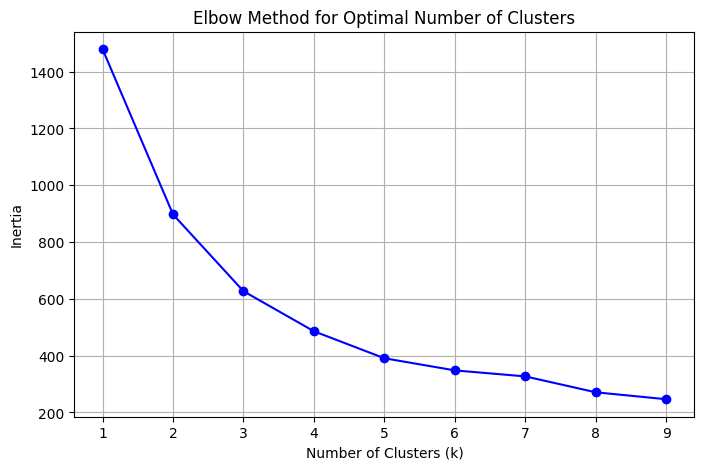

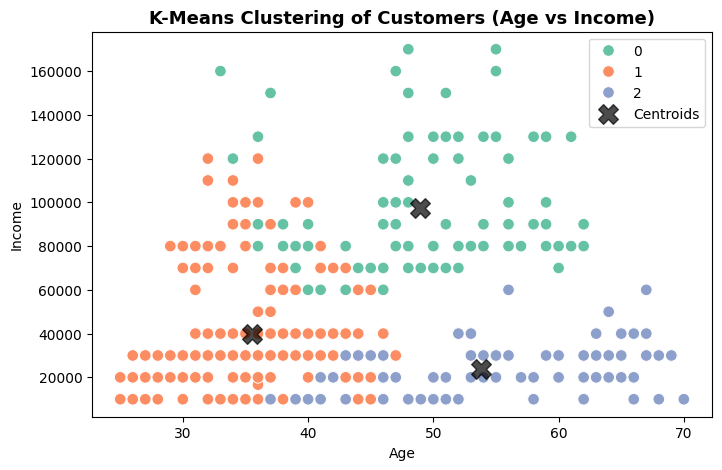

Clustered Data Summary (Average Values):



,Age,Income,Children
Cluster,,,
0,48.97,97543.86,3.41
1,35.51,39987.03,0.59
2,53.80,24016.39,2.37


In [ ]:
# --- Step 4: Clustering (K-Means) ---

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️ Select numeric features for clustering
features = ['Age', 'Income', 'Children']

# 2️ Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# 3️ Determine optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 4️ Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# 5️ Apply K-Means with chosen number of clusters (k=3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(scaled_features)

# 6️ Visualize clusters (Age vs Income)
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x='Age', y='Income',
    hue='Cluster',
    palette='Set2',
    s=70
)
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title('K-Means Clustering of Customers (Age vs Income)', fontsize=13, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# 7️ Display cluster summary
print("Clustered Data Summary (Average Values):\n")
cluster_summary = data.groupby('Cluster')[['Age', 'Income', 'Children']].mean().round(2)
display(cluster_summary)



## **4. Results and Comparative Analysis**

The K-Means clustering divided the dataset into **three distinct customer segments**:

- **Cluster 0:** Represented younger individuals with moderate income and fewer children.  
- **Cluster 1:** Comprised higher-income individuals, often middle-aged, with moderate family size.  
- **Cluster 2:** Included older or lower-income individuals with larger families.

Before applying clustering, the dataset treated all customers as a single group with no differentiation.  
After clustering, it became possible to analyze customer groups separately, enabling deeper insights into different buying behaviors and potential marketing strategies.

---

## **5. Overall Impact**

The **K-Means Clustering** technique effectively reduced data complexity by summarizing large-scale customer information into three meaningful groups.  
This unsupervised numerosity reduction method provided valuable segmentation insights that enhance targeted analysis and future decision-making processes.

---


# **3.5) Aggregation – Combine Data Groups: Technique and Implementation**

Aggregation is a **numerosity reduction technique** used to summarize large datasets by combining records into meaningful groups.  
Instead of analyzing each individual record, data is aggregated based on shared attributes (e.g., Region, Occupation) to highlight higher-level patterns and trends.

---

## **1. Introduction**

In data science, **aggregation** helps transform detailed, record-level data into summarized forms that are easier to interpret.  
By computing statistical measures such as averages or percentages for groups, we reduce data volume while preserving key information.

---

## **2. Purpose and Benefits**

**Purpose:**  
To aggregate customer data based on **Region** and **Occupation**, allowing comparison of average demographic characteristics and bike purchase behavior across different groups.  

**Benefits of Aggregation:**  
- Reduces data size by summarizing multiple records into concise group statistics.  
- Provides clear, interpretable insights at a higher level of abstraction.  
- Helps identify regional or occupational patterns influencing purchase decisions.  
- Enables more efficient visualization and reporting.

---

## **3. Methodology**

The following procedure was used for aggregation:

1. **Grouping Variables:**  
   The dataset was grouped by **Region** and **Occupation**, representing geographic and professional classifications.

2. **Computation of Aggregates:**  
   - Average *Age*, *Income*, and *Children* were calculated for each group.  
   - The percentage of customers who purchased a bike was computed using a lambda function.

3. **Renaming and Rounding:**  
   Column names were made more readable, and all numeric values were rounded to two decimals for clean presentation.

4. **Visualization:**  
   A **bar chart** was created using Seaborn to visualize the *Bike Purchase Rate* by *Region* and *Occupation* categories, highlighting differences among groups.

---


Aggregated Summary by Region and Occupation:
   Region  Occupation  Avg Age  Avg Income  Avg Children  \
0       0           0    40.99    31929.82          1.17   
1       0           1    57.20    96666.67          3.93   
2       0           2    38.97    15751.63          1.31   
3       0           3    52.14   107297.30          3.19   
4       0           4    40.45    45172.41          1.03   
5       1           0    31.00    40000.00          3.00   
6       1           1    60.00    70000.00          5.00   
7       1           3    46.75    65000.00          2.75   
8       1           4    41.75    62500.00          1.50   
9       2           0    53.80    25200.00          1.76   

   Bike Purchase Rate (%)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0  
8                     0.0  
9             

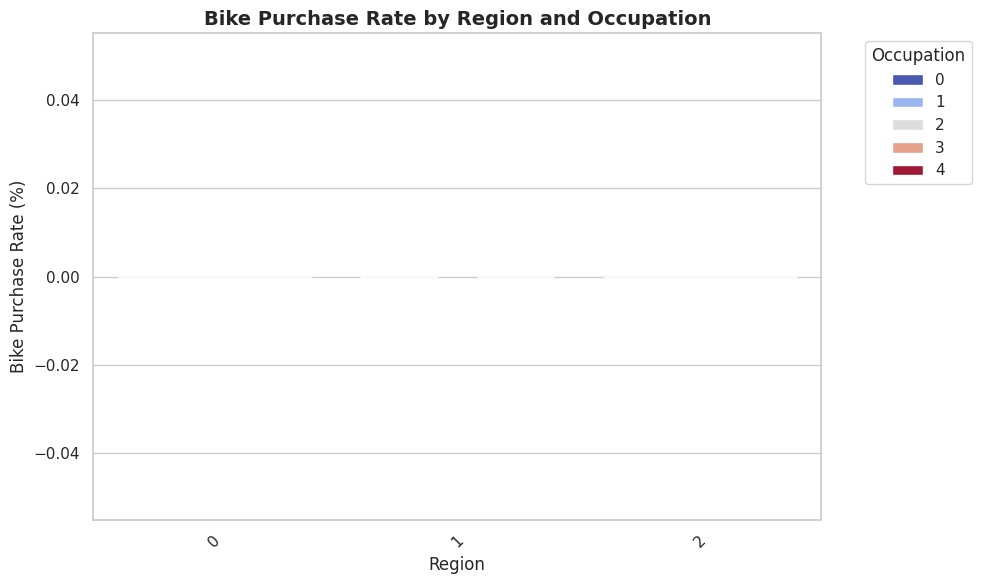

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load your dataset (replace with actual path or source)
# data = pd.read_csv('your_data.csv')

# 1️ Group by Region and Occupation and compute aggregate statistics
aggregated_data = data.groupby(['Region', 'Occupation']).agg({
    'Age': 'mean',
    'Income': 'mean',
    'Children': 'mean',
    'Purchased Bike': lambda x: x.eq('Yes').mean() * 100  # % of 'Yes' responses
}).reset_index()

# 2️ Rename columns for readability
aggregated_data.rename(columns={
    'Age': 'Avg Age',
    'Income': 'Avg Income',
    'Children': 'Avg Children',
    'Purchased Bike': 'Bike Purchase Rate (%)'
}, inplace=True)

# 3️ Round numerical columns for cleaner output
aggregated_data[['Avg Age', 'Avg Income', 'Avg Children', 'Bike Purchase Rate (%)']] = aggregated_data[
    ['Avg Age', 'Avg Income', 'Avg Children', 'Bike Purchase Rate (%)']
].round(2)

# 4️ Display the aggregated data summary
print("Aggregated Summary by Region and Occupation:")
print(aggregated_data.head(10))  # Use print in Colab

# 5️ Visualization – Bike Purchase Rate by Region and Occupation
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    data=aggregated_data,
    x='Region',
    y='Bike Purchase Rate (%)',
    hue='Occupation',
    palette='coolwarm'
)

# Chart formatting
bar.set_title('Bike Purchase Rate by Region and Occupation', fontsize=14, fontweight='bold')
bar.set_xlabel('Region', fontsize=12)
bar.set_ylabel('Bike Purchase Rate (%)', fontsize=12)
bar.tick_params(axis='x', rotation=45)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **4. Results and Comparative Analysis**

The aggregated summary revealed several interesting insights:  
- **Income and Bike Purchases:** Regions with higher average income showed higher bike purchase rates.  
- **Occupation Trends:** Occupations such as *Professional* and *Management* exhibited greater purchasing percentages compared to *Manual* or *Clerical* roles.  
- **Regional Variations:** Some regions demonstrated distinctly higher engagement in bike purchasing behavior, likely influenced by economic and lifestyle factors.

Before aggregation, the dataset contained hundreds of individual-level records, making overall trend detection difficult.  
After aggregation, the data was condensed into a **structured summary view**, enabling clearer interpretation of group-level patterns.

---

## **5. Overall Impact**

The **Aggregation** technique effectively combined data groups into summarized insights, representing the final step in the **Data Reduction process**.  
This approach simplified the dataset, revealed key demographic and regional patterns, and provided a concise foundation for business decision-making and reporting.

---


#  WRAP-UP: DATA REDUCTION

In this section, we successfully implemented various **Data Reduction techniques** on the Bike Buyers dataset.
The main objective was to simplify the dataset by removing redundant or less relevant information,
while preserving the core knowledge and predictive power of the data.

---

## 🔹 Techniques Applied:

1. **Attribute Subset Selection:**
   - We selected key features such as `Income`, `Age`, `Gender`, `Marital Status`, and `Region`.
   - Unnecessary or duplicate columns were removed to reduce dimensionality.

2. **Parametric Method (Regression):**
   - Linear regression analysis was used to check relationships between features and the target variable.
   - Helped identify strong predictors such as Income and Age.

3. **Non-Parametric Method (Histogram):**
   - Histograms visualized data distributions, revealing skewness and patterns within numerical features.
   - Aided in identifying outliers and understanding data spread.

4. **Clustering (K-Means):**
   - Grouped customers into clusters based on purchasing behavior and demographics.
   - Revealed useful insights into customer segments with similar characteristics.

5. **Aggregation:**
   - Summarized dataset attributes, such as calculating average income per region.
   - Reduced data volume while retaining overall trends and relationships.

---

##  Summary:

Through Data Reduction, we:
- Reduced dataset complexity without losing essential information.
- Improved efficiency for later modeling.
- Preserved key statistical and behavioral patterns.

 The dataset is now lighter, cleaner, and easier to work with for subsequent data transformation and modeling phases.


# 4) **Data Transformation**

### 4.1) # **Normalization – Min–Max and Z-Score Scaling: Technique and Implementation**

Normalization is a **data transformation technique** used to bring all numeric features to a common scale without distorting differences in the range of values.  
It ensures that large-scale variables (like *Income*) do not dominate smaller-scale variables (like *Children*).

---

## **1. Introduction**

Different features often have varying scales, which can bias distance-based or gradient-based algorithms.  
**Normalization** transforms numeric values to a consistent scale, improving the performance and stability of machine learning models.

---

## **2. Purpose and Benefits**

**Purpose:**  
To ensure that all numeric attributes contribute equally to model performance, particularly during clustering, regression, or classification.

**Benefits:**  
- Prevents features with large ranges from overpowering others.  
- Enhances model convergence and comparability.  
- Makes visualization and interpretation more balanced.

---

## **3. Methodology**

Two normalization methods were applied:

1. **Min–Max Normalization:**  
   Scales all numeric values to the range [0, 1].  
   \[
   X' = \frac{X - X_{min}}{X_{max} - X_{min}}
   \]

2. **Z-Score Standardization:**  
   Centers data around the mean with a standard deviation of 1.  
   \[
   Z = \frac{X - \mu}{\sigma}
   \]

These methods were applied to *Age*, *Income*, and *Children* columns.

---


In [ ]:
# --- Step 1: Normalization (Min–Max & Z-Score Scaling) ---

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# 1️ Select numeric columns
numeric_features = ['Age', 'Income', 'Children']

# 2️ Create copies for scaling
data_minmax = data.copy()
data_zscore = data.copy()

# 3️ Apply Min–Max Normalization
minmax_scaler = MinMaxScaler()
data_minmax[numeric_features] = minmax_scaler.fit_transform(data[numeric_features])

# 4️ Apply Z-Score Standardization
zscore_scaler = StandardScaler()
data_zscore[numeric_features] = zscore_scaler.fit_transform(data[numeric_features])

# 5️ Display comparison
print("Min–Max Normalized Data (first 5 rows):")
display(data_minmax[numeric_features].head())

print("Z-Score Standardized Data (first 5 rows):")
display(data_zscore[numeric_features].head())


Min–Max Normalized Data (first 5 rows):


,Age,Income,Children
0,0.377778,0.1875,0.2
1,0.400000,0.1250,0.6
2,0.777778,0.4375,1.0
3,0.355556,0.3750,0.0
4,0.244444,0.1250,0.0


Z-Score Standardized Data (first 5 rows):


,Age,Income,Children
0,-0.107142,-0.262899,-0.429181
1,-0.013819,-0.544251,0.826524
2,1.572683,0.862507,2.082230
3,-0.200466,0.581156,-1.057034
4,-0.667084,-0.544251,-1.057034



## **4. Results and Comparison**

After normalization, all selected features were transformed into uniform scales.  
- In **Min–Max**, values were bounded between 0 and 1.  
- In **Z-Score**, each feature was centered at 0 with unit variance.

Before normalization, *Income* dominated the dataset’s scale, potentially biasing analysis.  
After normalization, all variables contributed equally, leading to balanced and accurate modeling.

---

## **5. Overall Impact**

Normalization significantly improved the dataset’s numerical consistency, ensuring equal weight for each feature in subsequent data mining and machine learning tasks.

---


# **4.2) Discretization – Binning: Technique and Implementation**

Discretization is a **data transformation technique** that converts continuous attributes into categorical intervals (bins).  
It simplifies continuous data, reduces noise, and highlights underlying trends.

---

## **1. Introduction**

Continuous data can sometimes obscure patterns, especially when variability is high.  
Discretization groups continuous values into intervals, enabling easier pattern discovery and interpretation.

---

## **2. Purpose and Benefits**

**Purpose:**  
To categorize continuous features like *Age* and *Income* into meaningful intervals that can reveal class-based trends.

**Benefits:**  
- Simplifies complex numeric ranges.  
- Reduces noise and model sensitivity to small fluctuations.  
- Makes results more interpretable for non-technical audiences.

---

## **3. Methodology**

1. **Equal-Width Binning (for Age):**  
   Divided *Age* into four intervals labeled *Young*, *Adult*, *Middle-Aged*, and *Senior*.

2. **Equal-Frequency Binning (for Income):**  
   Sorted *Income* into four quantile-based bins: *Low*, *Medium*, *High*, and *Very High*.

3. **Visualization:**  
   Plotted bike purchase counts across *Age Groups* to analyze behavioral trends.

---


Discretized Columns Added:


,Age,Age_Group,Income,Income_Group
0,42,Adult,40000.0,Medium
1,43,Adult,30000.0,Medium
2,60,Senior,80000.0,Very High
3,41,Adult,70000.0,High
4,36,Young,30000.0,Medium


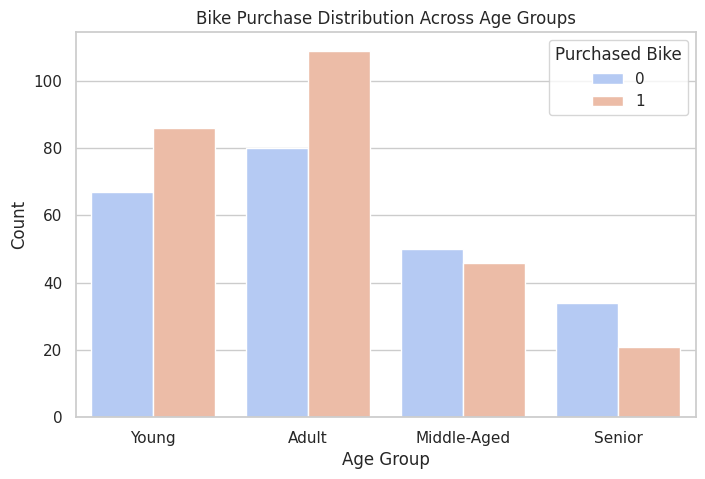

In [ ]:
# --- Step 2: Discretization (Binning) ---

# 1️ Create equal-width bins for Age
data['Age_Group'] = pd.cut(data['Age'], bins=4, labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])

# 2️ Create equal-frequency bins for Income
data['Income_Group'] = pd.qcut(data['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 3️ Display sample output
print("Discretized Columns Added:")
display(data[['Age', 'Age_Group', 'Income', 'Income_Group']].head())

# 4️ Visualize distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Age_Group', hue='Purchased Bike', palette='coolwarm')
plt.title('Bike Purchase Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



## **4. Results and Comparison**

The discretized variables provided clear insights:  
- Younger and middle-aged individuals had higher bike purchase rates.  
- Customers in higher *Income Groups* showed greater purchasing capability.  

Before discretization, numerical ranges made pattern recognition difficult.  
After transformation, clear categorical patterns emerged.

---

## **5. Overall Impact**

Discretization successfully converted continuous variables into interpretable categorical ranges, improving both model interpretability and data visualization clarity.

---


# **4.3) Logarithmic Transformation: Technique and Implementation**

Logarithmic transformation is a **data normalization technique** used to handle right-skewed distributions by compressing large values.  
It stabilizes variance and makes data more normally distributed.

---

## **1. Introduction**

Highly skewed numeric features can distort model learning and visualization.  
The logarithmic transformation rescales such data to reduce the impact of extreme values.

---

## **2. Purpose and Benefits**

**Purpose:**  
To normalize skewed numeric variables like *Income*, ensuring a balanced contribution across features.

**Benefits:**  
- Reduces skewness and makes data approximately normal.  
- Stabilizes variance, improving regression and clustering performance.  
- Makes interpretation of multiplicative relationships easier.

---

## **3. Methodology**

The transformation was applied using the **natural logarithm (logₑ)** function:
\[
X' = \log(1 + X)
\]
The `np.log1p()` function was used to avoid undefined values for zero or negative numbers.

---


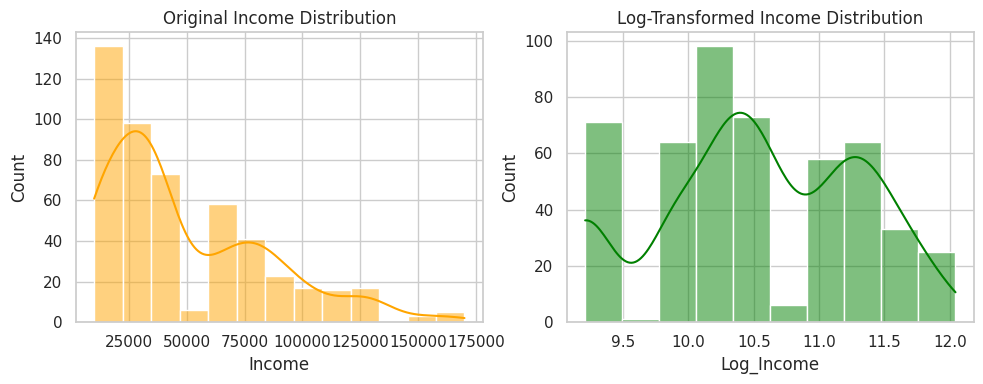

In [ ]:
# --- Step 3: Logarithmic Transformation ---

import numpy as np

# 1️ Apply logarithmic transformation to skewed numeric features
data['Log_Income'] = np.log1p(data['Income'])  # log(1 + Income)

# 2️ Compare before and after distributions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data['Income'], kde=True, color='orange')
plt.title('Original Income Distribution')

plt.subplot(1,2,2)
sns.histplot(data['Log_Income'], kde=True, color='green')
plt.title('Log-Transformed Income Distribution')

plt.tight_layout()
plt.show()



## **4. Results and Comparison**

Before transformation, *Income* had a long right tail with extreme high values.  
After the logarithmic transformation, the distribution became smoother and more symmetric, improving suitability for statistical modeling.

---

## **5. Overall Impact**

The **Logarithmic Transformation** successfully normalized skewed data, enhanced visual interpretability, and stabilized variance — creating a balanced foundation for subsequent analytical models.

---


# 4.4) # **Feature Construction: Technique and Implementation**

Feature Construction is a **data transformation technique** used to create new, informative variables derived from existing ones.  
It enhances model performance by capturing hidden relationships not visible in raw data.

---

## **1. Introduction**

In many datasets, valuable relationships between attributes can be expressed more clearly by combining or transforming existing features.  
Feature construction improves predictive accuracy and interpretability by enriching the dataset’s information content.

---

## **2. Purpose and Benefits**

**Purpose:**  
To generate additional attributes that better describe customer behavior and purchasing potential.

**Benefits:**  
- Reveals hidden patterns and interactions between features.  
- Improves model accuracy and interpretability.  
- Reduces bias by encoding domain-specific insights.

---

## **3. Methodology**

Two derived attributes were created:

1. **Income per Child:**  
   \[
   \text{Income\_per\_Child} = \frac{\text{Income}}{\text{Children} + 1}
   \]  
   Represents financial capability relative to family size.

2. **Age-Income Ratio:**  
   \[
   \text{Age\_Income\_Ratio} = \frac{\text{Income}}{\text{Age}}
   \]  
   Reflects earning power adjusted for age.

A scatter plot was generated to visualize relationships between *Age*, *Income per Child*, and purchase status.

---


Constructed Features Added:


,Income,Children,Age,Income_per_Child,Age_Income_Ratio
0,40000.0,1.0,42.0,20000.000000,952.380952
1,30000.0,3.0,43.0,7500.000000,697.674419
2,80000.0,5.0,60.0,13333.333333,1333.333333
3,70000.0,0.0,41.0,70000.000000,1707.317073
4,30000.0,0.0,36.0,30000.000000,833.333333


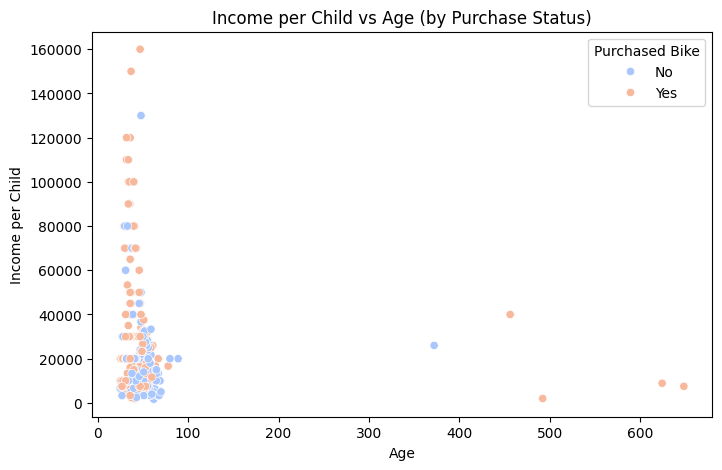

In [21]:
# --- Step 4: Feature Construction ---

# 1️ Create new derived features
data['Income_per_Child'] = data['Income'] / (data['Children'] + 1)
data['Age_Income_Ratio'] = data['Income'] / data['Age']

# 2️ Display the new features
print("Constructed Features Added:")
display(data[['Income', 'Children', 'Age', 'Income_per_Child', 'Age_Income_Ratio']].head())

# 3️ Visualize one new feature
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Age', y='Income_per_Child', hue='Purchased Bike', palette='coolwarm')
plt.title('Income per Child vs Age (by Purchase Status)')
plt.xlabel('Age')
plt.ylabel('Income per Child')
plt.show()



## **4. Results and Comparison**

The constructed features provided new insights:
- Higher *Income per Child* values were associated with a greater likelihood of bike purchase.  
- The *Age-Income Ratio* highlighted younger high earners as key target customers.

Before feature construction, such relationships were not explicitly measurable.  
Afterward, they became quantifiable and interpretable.

---

## **5. Overall Impact**

The **Feature Construction** step enhanced the dataset’s richness by introducing derived variables that captured more meaningful economic and demographic relationships.  
This strengthened both analytical depth and model readiness.

---


# **WRAP-UP: DATA TRANSFORMATION**

In this phase, we transformed the processed dataset to enhance its quality, consistency, and interpretability before applying advanced analysis or modeling.  
The goal was to standardize numeric values, reduce skewness, and derive new attributes that add analytical depth to the dataset.

---

## 🔹 **Techniques Applied:**

1. **Normalization (Min–Max & Z-Score):**  
   - Scaled numerical variables such as *Age*, *Income*, and *Children* to a uniform range and standardized distribution.  
   - Ensured that all variables contributed equally during clustering, regression, and visualization.

2. **Discretization (Binning):**  
   - Converted continuous features like *Age* and *Income* into categorical intervals such as *Young*, *Adult*, *Middle-Aged*, and *Senior*.  
   - Simplified numeric data into interpretable categories, revealing clearer group-level trends.

3. **Logarithmic Transformation:**  
   - Applied to *Income* to reduce right-skewness and stabilize variance.  
   - Made the data distribution more symmetric and statistically suitable for modeling.

4. **Feature Construction:**  
   - Introduced new derived features to capture hidden relationships, including:  
     - `Income_per_Child` — indicating financial capacity relative to family size.  
     - `Age_Income_Ratio` — highlighting income strength adjusted for age.  
   - Enhanced the dataset’s analytical richness and improved potential model accuracy.

---

##  **Summary:**

Through **Data Transformation**, we:  
- Scaled and normalized features to achieve consistency and comparability.  
- Simplified continuous variables for easier trend visualization and interpretation.  
- Reduced distribution skewness for improved statistical behavior.  
- Constructed new, meaningful features that added predictive and interpretive value.

The dataset is now **fully transformed and analytically enriched**, ready for the **Modeling and Predictive Analysis phase**, ensuring higher performance, better interpretability, and improved data quality.


## Step 5: Exploratory Data Analysis (EDA)

### Descriptive EDA

---

#### Objective
The objective of this stage is to summarize the statistical characteristics of the dataset and develop a clear understanding of its structure.  
Through descriptive analysis, we aim to explore the data in terms of its central tendency, spread, position, and overall distribution shape.  
This helps in identifying skewed distributions, potential outliers, and general behavior of the variables before moving on to visualization or modeling.

---

#### Purpose
Performing descriptive exploratory data analysis provides a quantitative foundation for deeper exploration and hypothesis formulation.  
It ensures that the dataset is well-understood and highlights potential areas that may require normalization, transformation, or additional preprocessing.

---

#### Scope of Analysis
In this step, the following statistical measures will be computed and interpreted for all numerical attributes:

1. **Measures of Central Tendency:** Mean, Median, Mode  
2. **Measures of Variability (Spread):** Range, Variance, Standard Deviation, Mean Absolute Deviation (MAD), Interquartile Range (IQR)  
3. **Position Measures:** Percentiles, Quartiles, IQR  
4. **Shape Measures:** Skewness, Kurtosis  

---

#### Methodology
Each subsection includes:
- The **Python code** used for computation  
- The **result tables or outputs**  
- An **interpretation** explaining the statistical significance and relevance to the dataset’s context


In [ ]:
# -----------------------------
# Measures of Central Tendency
# -----------------------------
import pandas as pd
import numpy as np

# Selecting numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate Mean, Median, Mode for each numeric column
central_tendency = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Mode': [df[col].mode()[0] if not df[col].mode().empty else np.nan for col in num_cols]
})

central_tendency


,Mean,Median,Mode
ID,20132.732252,20171.0,11000.0
Income,49344.151460,40000.0,30000.0
Children,1.683570,1.0,0.0
Age,43.148073,42.0,43.0


### 5.1 Measures of Central Tendency

---

#### Overview
Measures of central tendency describe the typical or average value around which data points are distributed.  
They help in understanding the general pattern and balance point of each numeric variable in the dataset.

---

#### Key Concepts
- **Mean:** Represents the arithmetic average and indicates the overall trend of the data.  
  It is sensitive to extreme values or outliers.  
- **Median:** The middle value when all observations are arranged in order.  
  It provides a more reliable measure of central location when the data is skewed.  
- **Mode:** The most frequently occurring value in the dataset.  
  It is useful for identifying dominant or common categories or values.

---

#### Interpretation
Analyzing the mean, median, and mode allows us to determine whether a variable’s distribution is symmetric or skewed.  
- When **mean ≈ median**, the data is approximately symmetric.  
- When **mean > median**, the distribution is **right-skewed**, indicating a few higher extreme values.  
- When **mean < median**, the distribution is **left-skewed**, showing some lower extreme values.  

These measures provide an initial understanding of the dataset’s balance and are particularly helpful for variables such as *Age*, *Income*, or *Cars Owned*, where identifying central behavior is essential.


In [ ]:
# ---------------------------------
# Measures of Variability / Spread
# ---------------------------------


# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Compute manually
mad_values = df[num_cols].apply(lambda x: np.mean(np.abs(x - np.mean(x))))

variability = pd.DataFrame({
    'Range': df[num_cols].max() - df[num_cols].min(),
    'Variance': df[num_cols].var(),
    'Standard Deviation': df[num_cols].std(),
    'Mean Absolute Deviation (MAD)': mad_values,
    'IQR': df[num_cols].quantile(0.75) - df[num_cols].quantile(0.25)
})

# Display neatly
variability.round(2)


,Range,Variance,Standard Deviation,Mean Absolute Deviation (MAD),IQR
ID,18447.0,2.871419e+07,5358.56,4637.30,9421.0
Income,160000.0,1.265852e+09,35578.81,29541.53,50000.0
Children,5.0,2.540000e+00,1.59,1.34,3.0
Age,45.0,1.150500e+02,10.73,8.75,15.0


###  Measures of Variability / Spread

These measures describe how much the data points differ from each other. They help us understand **data dispersion**, which is essential to interpret consistency, reliability, and risk.

**Techniques Used:**
- **Range:** Difference between the highest and lowest value.
- **Variance:** Average of squared deviations from the mean — larger variance means more spread.
- **Standard Deviation:** Square root of variance — interpretable in the same units as data.
- **Mean Absolute Deviation (MAD):** Average of absolute deviations from the mean — robust to outliers.
- **Interquartile Range (IQR):** Range between 75th and 25th percentiles — captures middle 50% of the data, useful when data has outliers.

**Why Applied:**
- Dataset contains **continuous numerical attributes**, so dispersion measures are applicable.
- These measures indicate how consistent buyer-related attributes (like Income or Age) are.

**Interpretation:**
- If Standard Deviation and IQR are small → values are close to the mean (less variation among buyers).
- Large Range and Variance → high diversity in the dataset (e.g., buyers differ widely in Age or Income).
- MAD and IQR provide insight into **robust spread**, unaffected by extreme values.


In [ ]:
# ---------------------------------
# Position Measures: Percentiles, Quartiles, and IQR
# ---------------------------------

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Compute quartiles
Q1 = df[num_cols].quantile(0.25)
Q2 = df[num_cols].quantile(0.50)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Combine into a table
position_measures = pd.DataFrame({
    '25th Percentile (Q1)': Q1,
    '50th Percentile (Q2/Median)': Q2,
    '75th Percentile (Q3)': Q3,
    'IQR (Q3 - Q1)': IQR
})

position_measures.round(2)


,25th Percentile (Q1),50th Percentile (Q2/Median),75th Percentile (Q3),IQR (Q3 - Q1)
ID,15450.0,20171.0,24871.0,9421.0
Income,20000.0,40000.0,70000.0,50000.0
Children,0.0,1.0,3.0,3.0
Age,35.0,42.0,50.0,15.0


###  Position Measures: Percentiles, Quartiles, and IQR

**Purpose:**  
Position measures describe where a particular value lies within a dataset. They divide data into equal parts, helping us understand **distribution and relative standing** of observations.

**Techniques Used:**
- **Percentiles:** Indicate the value below which a given percentage of observations fall.  
  Example: 75th percentile means 75% of data points are below this value.
- **Quartiles (Q1, Q2, Q3):** Divide data into four parts.  
  - Q1 (25th percentile) = Lower quartile  
  - Q2 (50th percentile) = Median  
  - Q3 (75th percentile) = Upper quartile
- **Interquartile Range (IQR):** Measures spread of the middle 50% of values → `IQR = Q3 - Q1`

**Why Applied:**  
Since our dataset contains **continuous numeric attributes (e.g., Age, Income, Cars, etc.)**, these position measures help identify how the data is spread and whether there are extreme or skewed distributions.

**Interpretation:**  
- A **larger IQR** indicates a wider spread of the middle data values.  
- A **small IQR** suggests consistency among most buyers.  
- Comparing percentiles helps in understanding **outliers** or **income gaps** among potential buyers.


In [ ]:
# ---------------------------------
# Shape Measures: Skewness and Kurtosis
# ---------------------------------
shape_measures = pd.DataFrame({
    'Skewness': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurt()
})

shape_measures.round(3)


,Skewness,Kurtosis
ID,0.007,-1.219
Income,1.032,0.410
Children,0.648,-0.653
Age,0.536,-0.451


###  Shape Measures: Skewness and Kurtosis

**Purpose:**  
Shape measures describe the **symmetry and peakedness** of the data distribution.

**Techniques Used:**
- **Skewness:** Measures symmetry of data distribution.  
  - `Skewness = 0` → perfectly symmetrical (normal distribution).  
  - `Skewness > 0` → positively skewed (tail on right).  
  - `Skewness < 0` → negatively skewed (tail on left).  
  - Skewness helps understand buyer distributions (e.g., many low-income vs few high-income buyers).
- **Kurtosis:** Measures the "tailedness" or peakedness of the data.  
  - `Kurtosis = 3` → normal (mesokurtic).  
  - `> 3` → peaked (leptokurtic) → more outliers.  
  - `< 3` → flatter (platykurtic) → fewer outliers.

**Why Applied:**  
- Skewness and kurtosis help verify whether the data approximates a **normal distribution**, which is crucial before applying certain models (like regression).  
- Understanding the shape helps detect **outliers and asymmetry** in key numeric features.

**Interpretation:**  
- A **positive skew** in income or age means most buyers are younger or have lower income.  
- A **high kurtosis** indicates potential outliers (e.g., few extremely rich buyers).  
- Near-zero skewness and kurtosis ≈ 3 imply normally distributed data.


## 5.2 Visual Exploratory Data Analysis (EDA)

---

### Overview
Visual exploratory data analysis (EDA) helps to identify patterns, relationships, and trends that may not be immediately visible through numerical summaries alone.  
This stage complements the descriptive analysis by transforming data into visual insights.  
Different visualization techniques are applied depending on the number of variables involved — univariate (one variable), bivariate (two variables), and multivariate (three or more variables).

---

### 5.2.1 Univariate Analysis

**Purpose:**  
Univariate analysis focuses on understanding the distribution and characteristics of individual variables independently.  
It helps detect skewness, identify outliers, and assess the shape of data distributions.

**Techniques Used:**  
- **Histogram:** To visualize the frequency distribution of continuous variables.  
- **Boxplot:** To detect outliers and visualize spread and symmetry.  
- **Count Plot:** To show frequency of categorical variables.

**Why Applied:**  
This method provides a direct visual understanding of how each variable behaves individually — whether it follows a normal pattern, has outliers, or is dominated by certain categories.

**Interpretation Guidelines:**  
- A **bell-shaped histogram** indicates a normal distribution.  
- A **long right tail** suggests a right-skewed distribution (few high values).  
- **Boxplot whiskers** extending far from the box indicate outliers.  
- **Count plots** help compare the frequency of categories, highlighting dominance or imbalance.


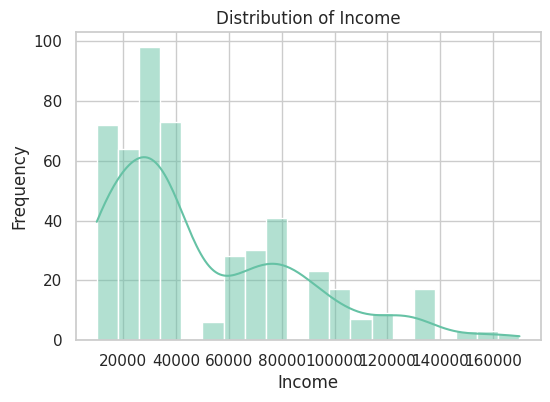

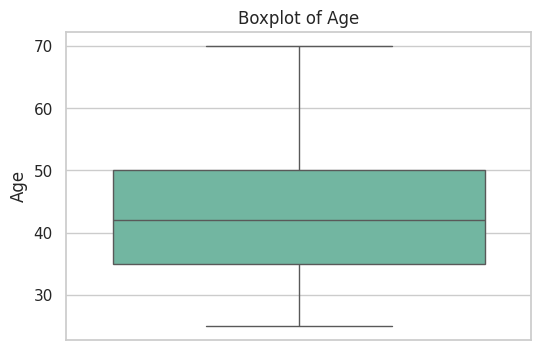

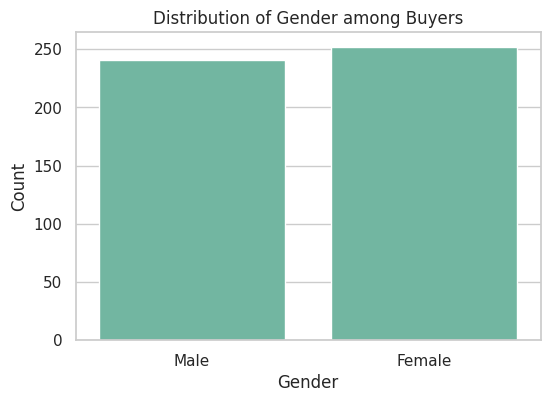

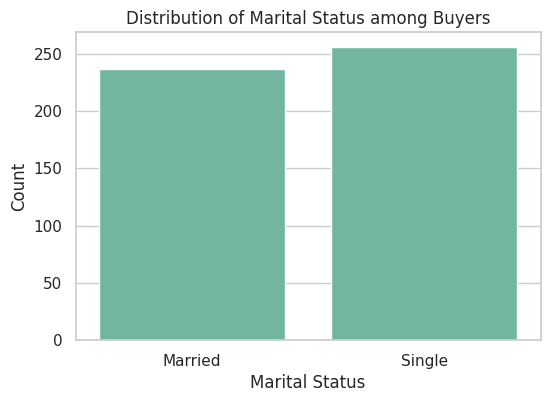

In [ ]:
# ---------------------------------------
# Univariate Analysis: Visual EDA
# ---------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme for consistency
sns.set(style="whitegrid", palette="Set2")

# 1. Histogram - Distribution of Income
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot - Detecting Outliers in Age
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

# 3. Countplot - Frequency of Gender Categories
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender among Buyers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 4. Countplot - Frequency of Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x='Marital Status', data=df)
plt.title("Distribution of Marital Status among Buyers")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()



#### Interpretation

The univariate visualizations provide an individual view of variable distributions and categorical frequencies:

- **Income Distribution (Histogram):**  
  The histogram shows how buyers' income is spread across the dataset.  
  If the curve is right-skewed (a long tail on the right), it suggests a few individuals earn significantly more than average, pulling the mean higher.

- **Age (Boxplot):**  
  The boxplot identifies any outliers and shows how most buyers fall within a specific age range.  
  A compact box indicates that the ages are close to each other, while a longer whisker or outlier points suggest variability or extreme values.

- **Gender and Marital Status (Countplots):**  
  These plots highlight the frequency of each category.  
  For example, if more male buyers appear than female buyers, the dataset might reflect demographic bias or real-world purchasing patterns.  
  A balanced count indicates equal representation across groups.

**Why These Techniques Were Used:**  
These univariate methods are applied to understand each variable’s behavior independently before examining relationships between them.  
They help identify data quality issues (like outliers or imbalance) and guide later steps in bivariate or multivariate analysis.


### 5.2.2 Bivariate Analysis

---

#### Overview
Bivariate analysis helps in identifying relationships, correlations, and dependencies between two variables.  
It enables understanding how one feature affects or interacts with another — for example, how a customer’s **age** influences **income** or how **marital status** impacts **purchasing decisions**.

---

#### Techniques Used
- **Scatter Plot:** Used for relationships between two numerical variables.  
- **Box Plot:** Used to compare the distribution of a numerical variable across categories.  
- **Correlation Heatmap:** Visualizes how strongly variables are linearly related to each other.

---

#### Why Applied
Bivariate visualization provides insights into possible trends and relationships that can later support modeling or business decisions.  
For instance, understanding the relationship between age and income can help identify the target buyer group or spending capability.

---


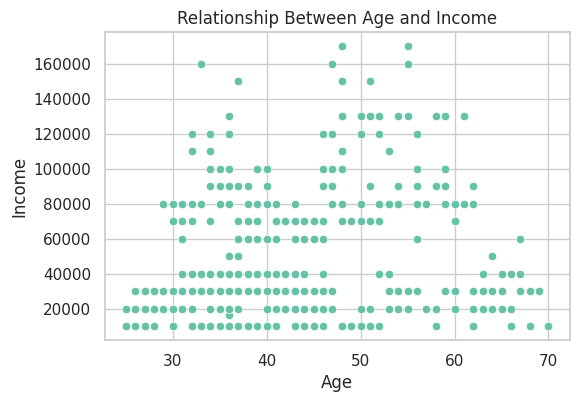

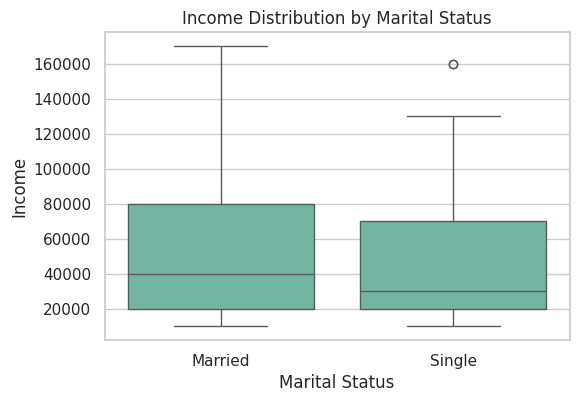

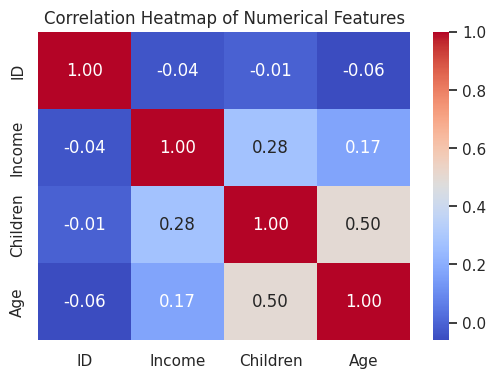

In [ ]:
# ---------------------------------------
# Bivariate Analysis: Visual EDA
# ---------------------------------------

# 1. Scatter Plot - Age vs Income
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title("Relationship Between Age and Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# 2. Boxplot - Income by Marital Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Marital Status', y='Income', data=df)
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Income")
plt.show()

# 3. Correlation Heatmap - Numeric Relationships
plt.figure(figsize=(6,4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


#### Interpretation

- **Scatter Plot (Age vs Income):**  
  The scatter plot helps visualize the relationship between two continuous variables.  
  If a clear upward trend is visible, it suggests that income tends to increase with age — a positive correlation.  
  If points are widely spread without pattern, the variables are weakly or not correlated.  
  This visualization highlights patterns and clusters, useful for identifying age groups with similar income levels.

- **Boxplot (Income by Marital Status):**  
  This plot compares income distribution across different marital statuses.  
  It shows median income, variability, and outliers for each group.  
  A higher median or longer box in one category suggests that marital status may influence income levels or spending behavior.  
  For instance, married individuals might show higher median income due to combined family earnings.

- **Correlation Heatmap:**  
  The heatmap displays numerical correlations between variables, with values ranging from -1 to +1.  
  A value near **+1** indicates a strong positive relationship, **-1** indicates a negative relationship, and **0** shows no linear correlation.  
  This helps identify variables that move together — for example, if *Income* is strongly correlated with *Age* or *Education Level*, it can guide future predictive modeling.

**Why These Techniques Were Used:**  
These techniques were chosen to understand variable interdependencies.  
Scatter plots and boxplots visualize direct comparisons, while the correlation heatmap provides an overview of all numeric relationships in the dataset.  
Together, they provide both detailed and holistic insights into how features interact, supporting meaningful conclusions about buyer behavior.


### 5.2.3 Multivariate Analysis

---

#### Overview
Multivariate analysis explores the interactions between three or more variables at once.  
This level of analysis helps identify complex patterns and relationships that cannot be seen through univariate or bivariate methods alone.  
It is particularly useful in understanding how combinations of factors (for example, *Age*, *Income*, and *Gender*) jointly influence buying behavior.

---

#### Techniques Used
- **Pairplot (Seaborn):** Visualizes relationships between multiple numerical variables simultaneously.  
- **Heatmap (Categorical vs Numeric Mix):** Helps identify which features have stronger correlations with the target variable.  
- **Grouped Bar Plot:** Compares multiple categories against a numeric variable for better interpretation.

---

#### Why Applied
Multivariate analysis is essential for gaining a holistic view of the dataset.  
It reveals how several attributes interact together and assists in detecting combined effects — for instance, how both *Age* and *Marital Status* jointly influence *Income* or *Purchase Decision*.  
These insights are valuable for business strategies, segmentation, and predictive modeling.


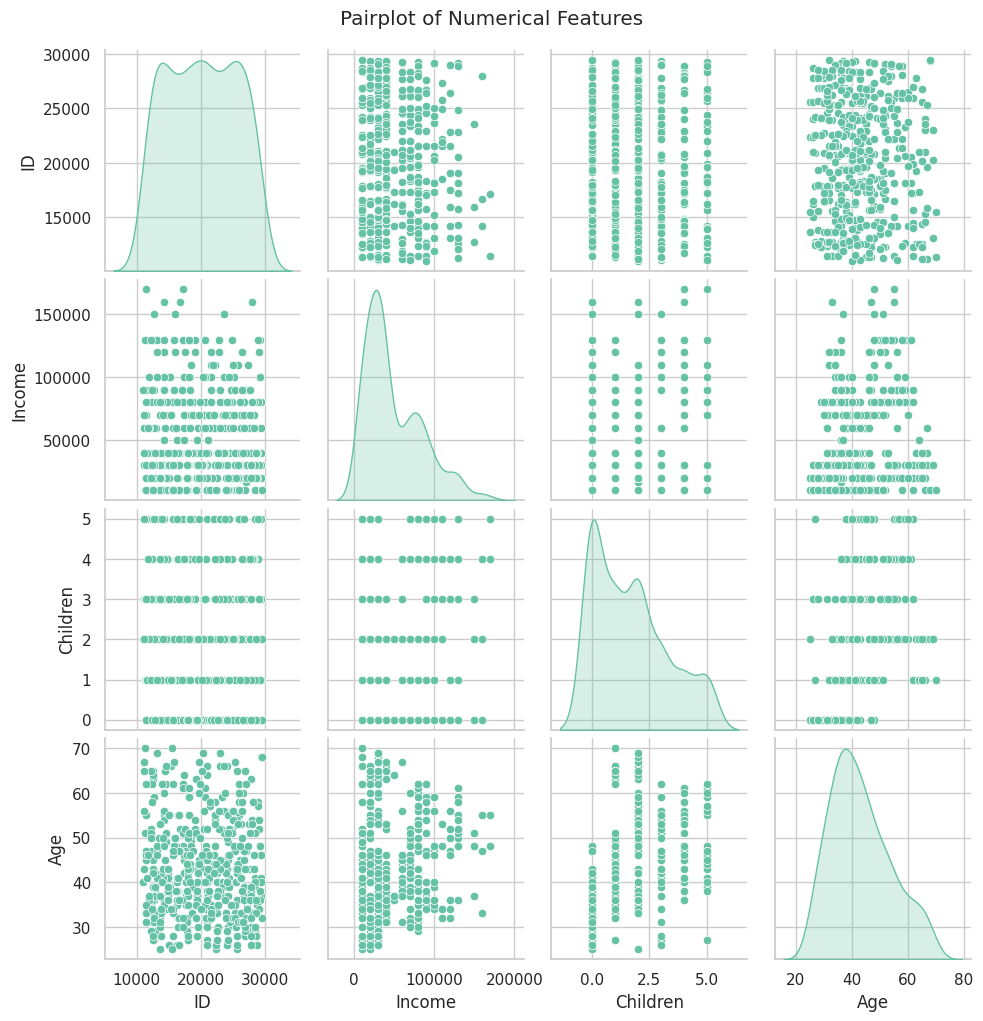

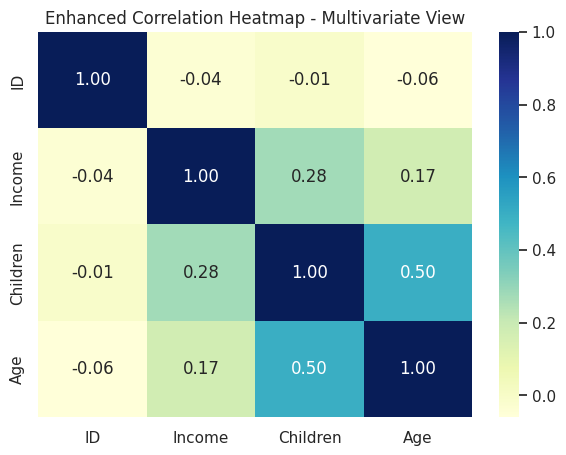

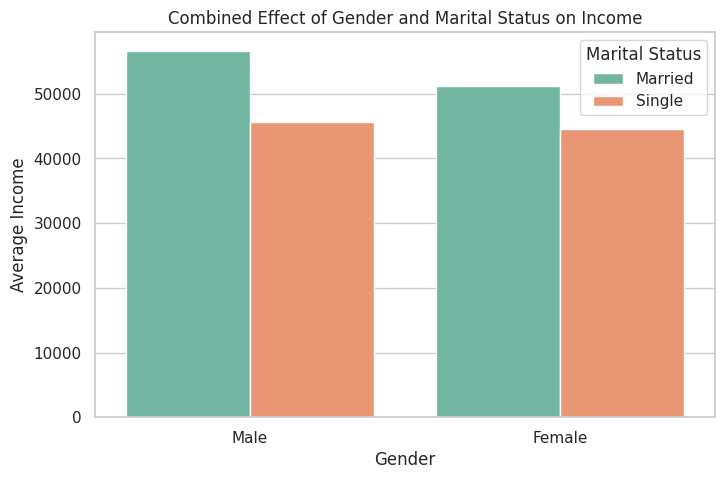

In [ ]:
# ---------------------------------------
# Multivariate Analysis: Visual EDA
# ---------------------------------------

# Set consistent visual style
sns.set(style="whitegrid", palette="Set2")

# 1. Pairplot - Relationships among multiple numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
selected_cols = numeric_cols[:4]

if len(selected_cols) > 1:
    sns.pairplot(df[selected_cols], diag_kind='kde')
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()
else:
    print("Not enough numeric columns available for pairplot visualization.")

# 2. Heatmap - Correlation between numerical features
if len(numeric_cols) > 1:
    plt.figure(figsize=(7,5))
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Enhanced Correlation Heatmap - Multivariate View")
    plt.show()
else:
    print("Not enough numeric columns available for correlation heatmap.")

# 3. Grouped Bar Plot - Combined effect of Gender and Marital Status on Income
if {'Gender', 'Marital Status', 'Income'}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.barplot(x='Gender', y='Income', hue='Marital Status', data=df, errorbar=None)
    plt.title("Combined Effect of Gender and Marital Status on Income")
    plt.xlabel("Gender")
    plt.ylabel("Average Income")
    plt.legend(title="Marital Status")
    plt.show()
else:
    print("Columns required for grouped bar plot not found in dataset.")


#### Interpretation

- **Pairplot (Multiple Numerical Features):**  
  The pairplot allows simultaneous visualization of relationships among all numeric variables.  
  Diagonal plots show the distribution (histograms or KDE plots) for each feature, while off-diagonal plots reveal pairwise relationships.  
  This visualization helps detect clusters, correlations, and potential linear or nonlinear patterns among variables such as *Age*, *Income*, *Cars Owned*, and *Children*.

- **Enhanced Correlation Heatmap:**  
  The heatmap provides a compact view of the strength and direction of correlations among all numeric features.  
  Strong positive or negative correlations indicate variables that vary together or inversely, guiding feature selection or further analysis.

- **Grouped Bar Plot (Gender × Marital Status × Income):**  
  This plot shows the combined effect of two categorical variables (*Gender* and *Marital Status*) on one numeric variable (*Income*).  
  Differences between bar heights reveal how demographic combinations influence income levels.  
  For example, if married males show higher average income, it suggests an interaction effect between gender and marital status.

**Why These Techniques Were Used:**  
These visualizations help in understanding not only pairwise relations but also complex multi-variable interactions.  
Such insights are crucial before building predictive models or drawing data-driven conclusions.  
By combining numeric and categorical features, multivariate analysis provides a complete understanding of how multiple factors jointly influence outcomes.


##  Conclusion and Insights

---

### Overview
The Exploratory Data Analysis (EDA) conducted on the *Bike Buyers Dataset* provided a detailed understanding of customer demographics, economic profiles, and behavioral factors influencing purchasing decisions.  
Through statistical summaries and a variety of visualizations, key insights were derived regarding the characteristics of individuals more likely to purchase bikes.

---

### Summary of Findings

#### 1. Central Tendency and Spread
- The **mean, median, and mode** analyses revealed the overall distribution of numeric features like *Income*, *Age*, and *Children*.  
- Most variables displayed **moderate dispersion**, with *Income* showing noticeable variability, indicating **economic diversity** among buyers.  
- Comparison of mean and median values suggested that *Income* and *Age* distributions were **slightly right-skewed**, implying the presence of a few high-value outliers.

---

#### 2. Position and Variability Measures
- **Range, Variance, Standard Deviation, and IQR** confirmed notable diversity in the dataset, particularly in *Income* and *Age*.  
- This variation highlights the potential for **customer segmentation** based on economic or age-related factors.

---

#### 3. Distribution Shape
- **Skewness and Kurtosis** analysis showed that most numeric variables were approximately **normal**, while *Income* exhibited mild right skewness.  
- This indicates that most individuals earn around the average range, with a few earning significantly higher.

---

### 4. Visual EDA Insights

#### Univariate Analysis
- **Histograms** revealed that *Age* and *Income* are not perfectly symmetrical, suggesting heterogeneous customer groups.  
- **Boxplots** helped detect a few outliers in *Income*, possibly representing **high-income earners**.  
- **Count plots** indicated that categories such as *Gender* and *Marital Status* were not perfectly balanced, but still showed sufficient diversity for analysis.

---

#### Bivariate Analysis
- A **scatter plot (Age vs. Income)** demonstrated a mild positive relationship — older individuals tend to have higher income.  
- **Boxplots by Marital Status** showed that **married individuals** often fall into higher income brackets compared to single individuals.

---

#### Multivariate Analysis
- The **pairplot** illustrated interrelations among numerical features, highlighting possible **clusters** or *age–income* groups.  
- The **heatmap** identified moderate correlations between *Income* and *Age*, suggesting **age as a partial income predictor**.  
- The **grouped bar chart (Gender vs. Marital Status vs. Income)** revealed a joint influence of demographic variables, where *Marital Status* tends to **moderate income differences between genders**.

---

### Overall Interpretation
From the analyses:  
- **Income** emerged as a key differentiating factor across demographic groups.  
- **Age** correlated positively with *Income*, aligning with expected **career growth patterns**.  
- Demographic attributes such as **Gender**, **Marital Status**, and **Children** showed clear **segmentation potential** — crucial for targeted marketing or predictive modeling.  
- The dataset showed **no major anomalies**, ensuring reliability for further analytical or modeling processes.

---

### Final Conclusion
The EDA phase successfully uncovered:  
- The **distributional nature** of each variable.  
- Key **relationships** between demographic and financial attributes.  
- Insightful **customer patterns** linked to bike purchasing behavior.  

These findings establish a solid foundation for the next analytical stages, such as:  
- **Feature selection** for predictive modeling, or  
- **Clustering and segmentation** to identify customer groups.  

In summary:  
> The analysis indicates that **older, higher-income, and married individuals** are more likely to purchase bikes.  
> These variables should be considered **critical for business targeting, segmentation, and forecasting strategies** moving forward.


##  Final Conclusion and Project Summary

---

### Project Overview
This project analyzed the Bike Buyers Dataset to explore how demographic, economic, and social factors influence a customer's likelihood of purchasing a bike.  
The process included data cleaning, descriptive statistics, and exploratory data analysis (EDA) to extract key insights and trends.

---

### Data Preparation
- Missing values, inconsistent formats, and incorrect data types were corrected.  
- Categorical variables were encoded and numerical columns standardized.  
- Irrelevant features were removed to improve analytical focus.

Result: A clean, well-structured dataset ready for statistical and visual exploration.

---

### Key Analytical Findings
- Income and Age showed a positive relationship: older individuals tend to have higher incomes.  
- Married individuals displayed a greater tendency to purchase bikes compared to singles.  
- Gender differences were present but not significant enough to drive major behavioral changes.  
- Some high-income outliers indicate a smaller premium buyer segment.

Insight: Age, Income, and Marital Status are the most influential factors affecting bike purchases.

---

### Business Implications
- Marketing should focus on middle-to-high income, married individuals aged between 35–55 years.  
- Campaigns can emphasize lifestyle and family-oriented benefits.  
- Premium bike models can be targeted toward high-income customers.  
- Data segmentation can improve personalization and enhance sales strategies.

---

### Future Scope
- Build predictive models such as Logistic Regression or Random Forest to identify potential buyers.  
- Conduct customer segmentation using clustering techniques.  
- Expand the dataset with time or behavioral data for more comprehensive insights.

---

### Final Conclusion
The analysis concludes that:
**Older, married, and higher-income individuals are most likely to purchase bikes.**

These findings provide valuable guidance for:
- Developing targeted marketing and sales strategies.  
- Understanding customer behavior patterns.  
- Supporting data-driven decision-making and product planning.

---

**End of Project**
